In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
import xgboost as xgb


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df_read=pd.read_csv("/kaggle/input/dataset-4/train.csv")

In [3]:
df=df_read

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [5]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


## EDA

In [7]:
df.drop(columns='id',inplace=True)

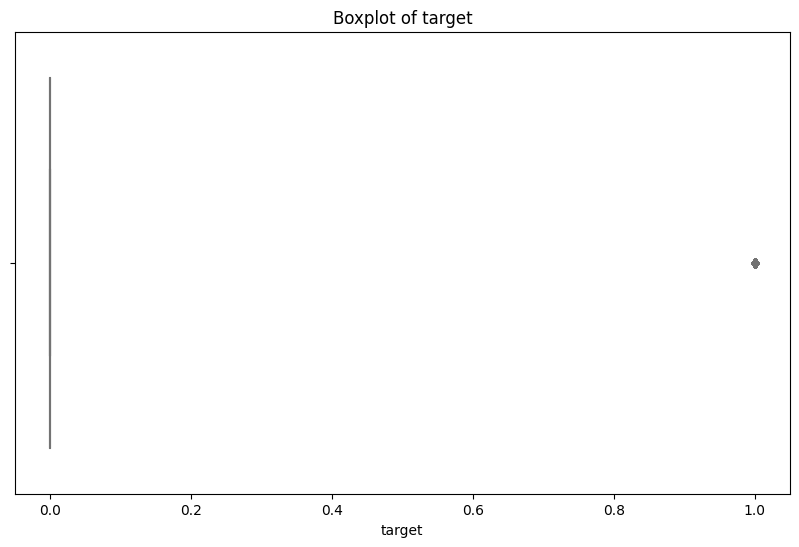

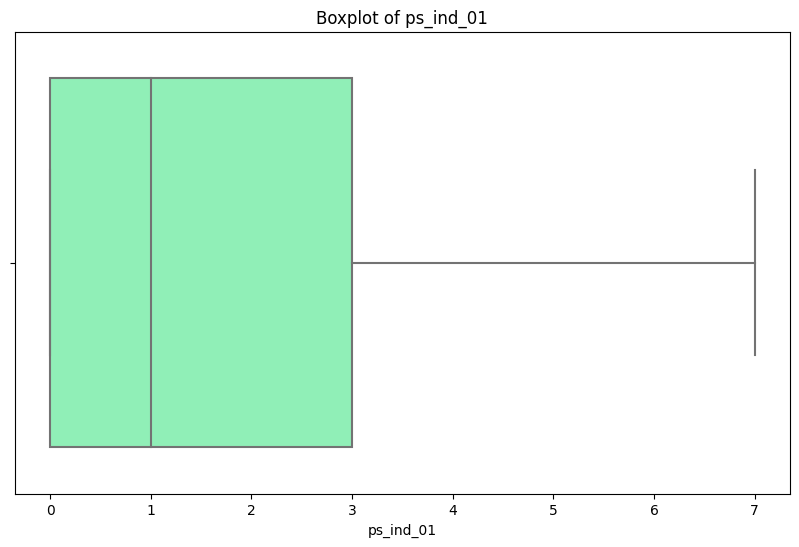

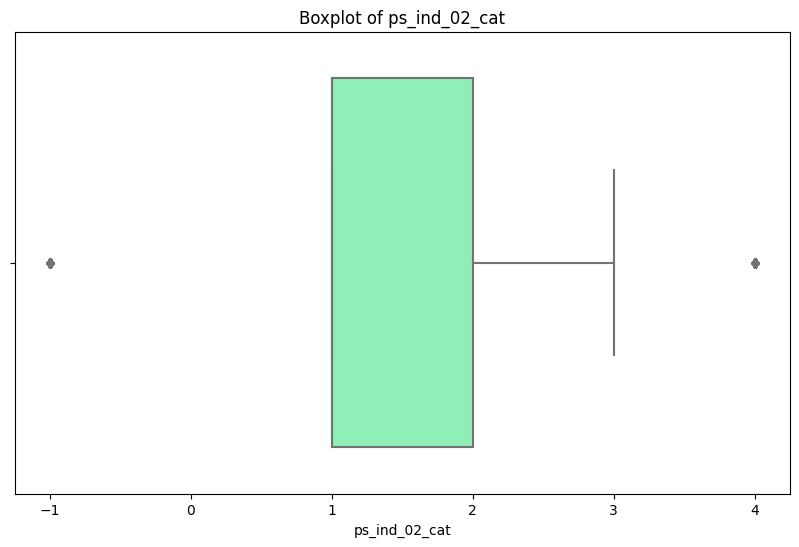

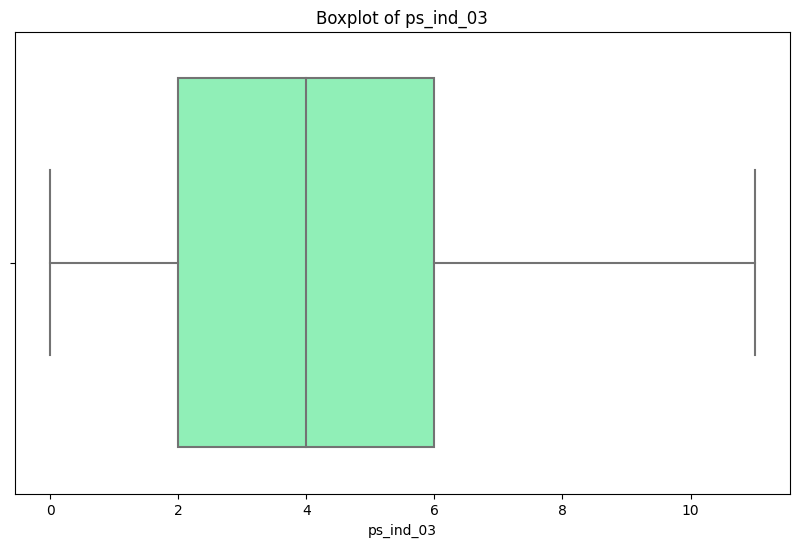

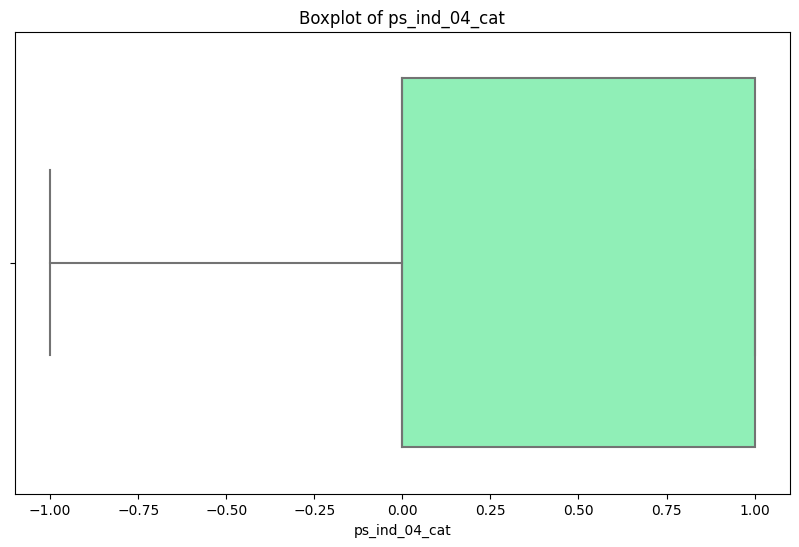

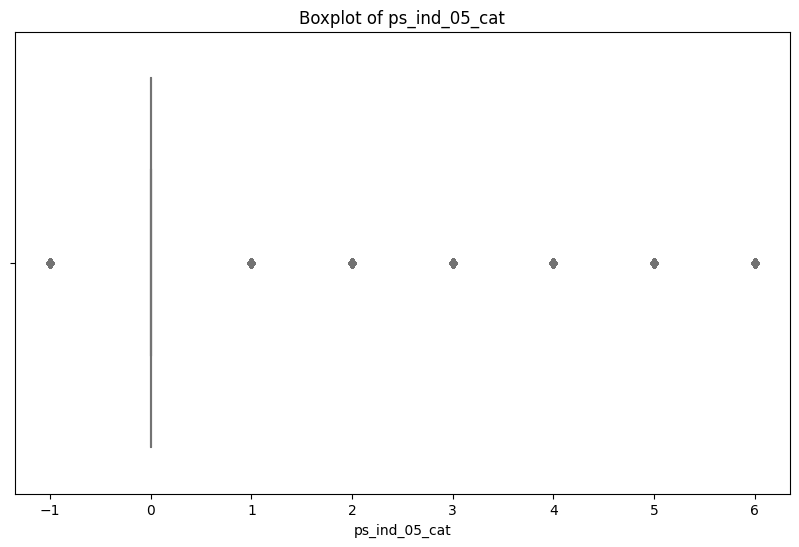

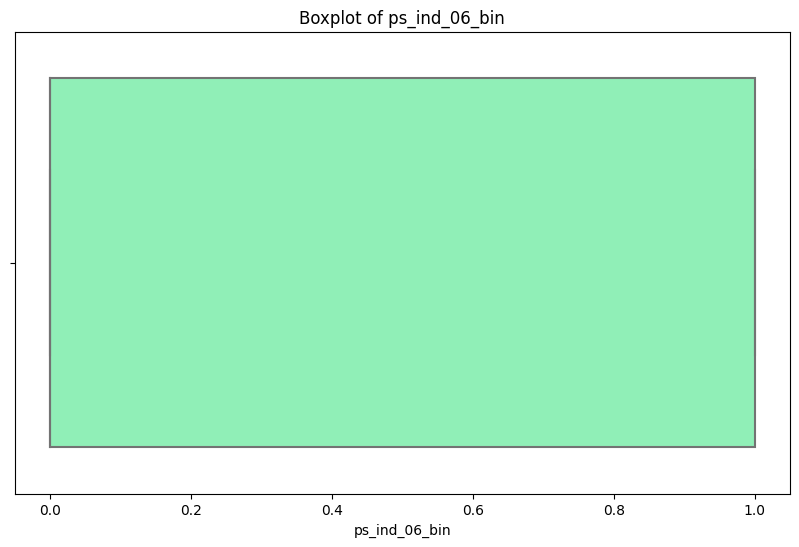

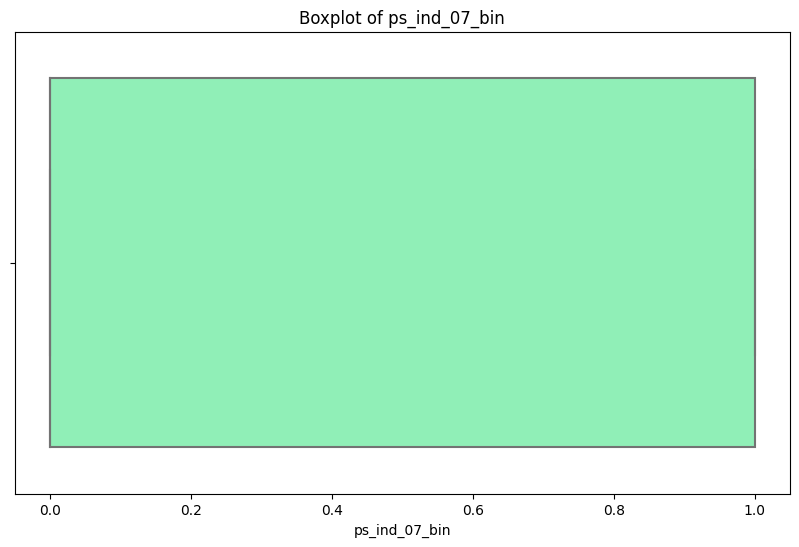

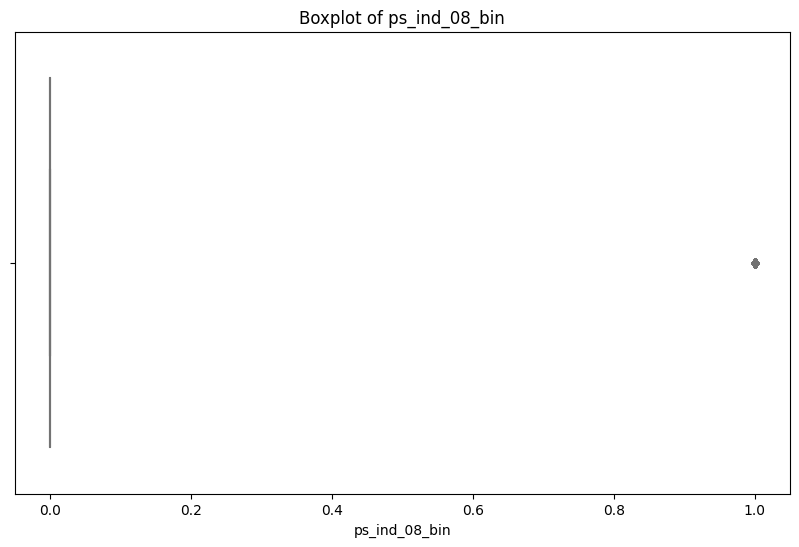

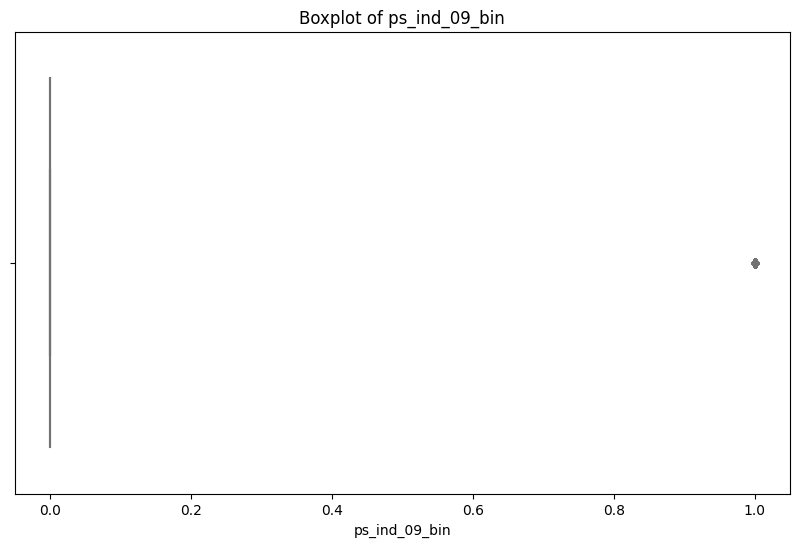

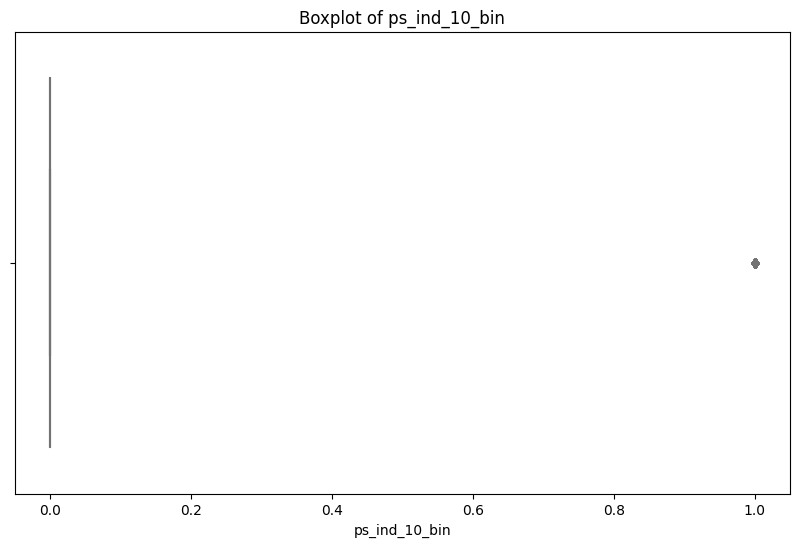

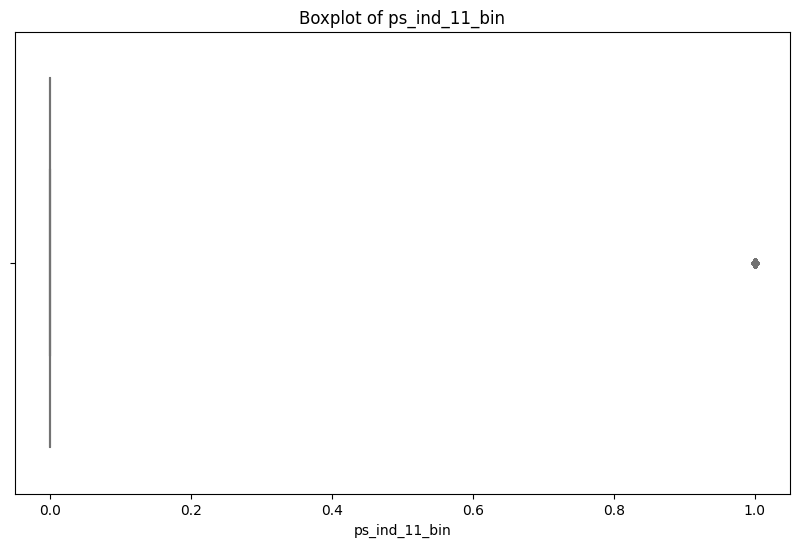

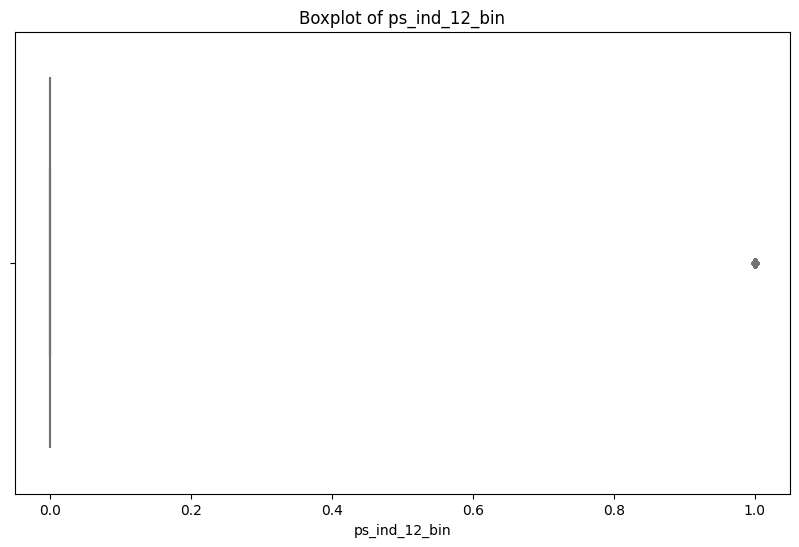

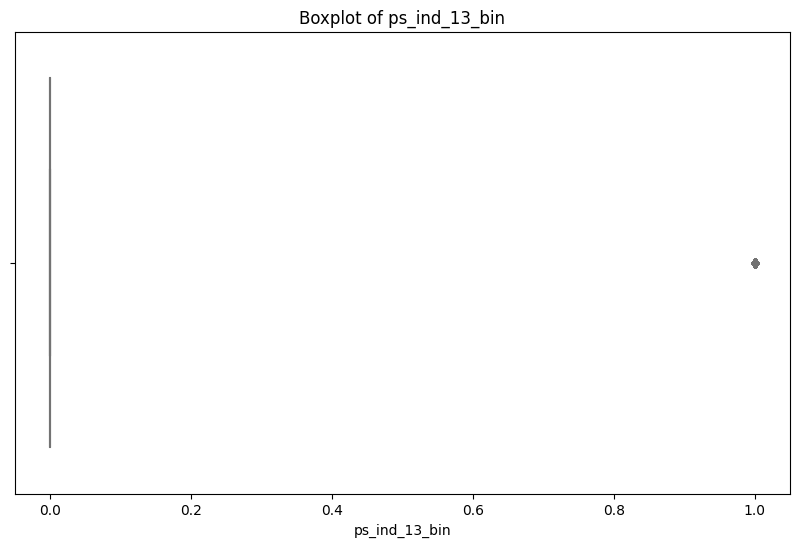

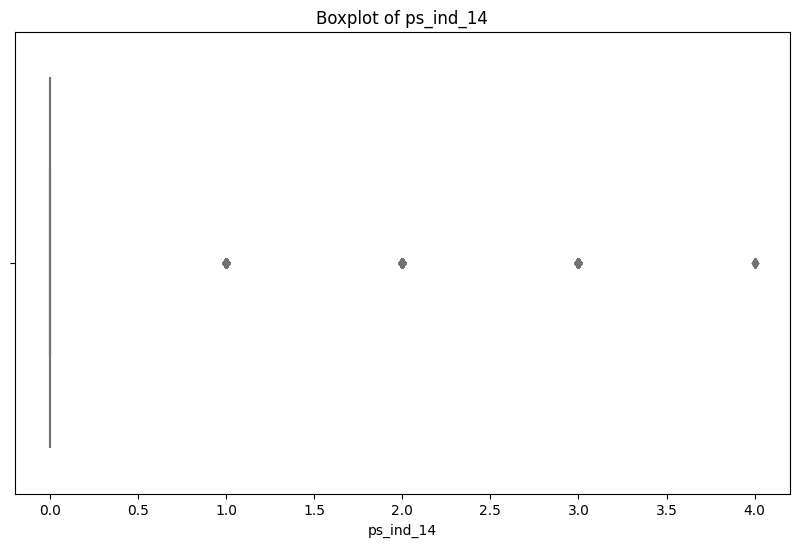

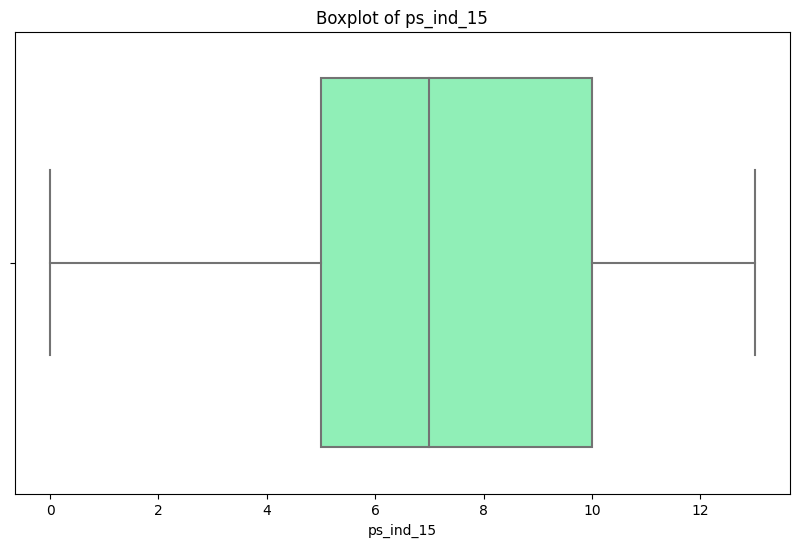

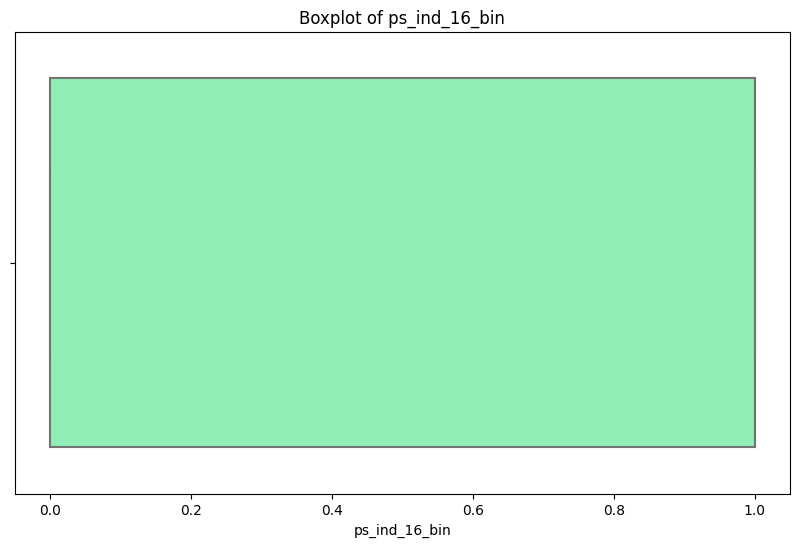

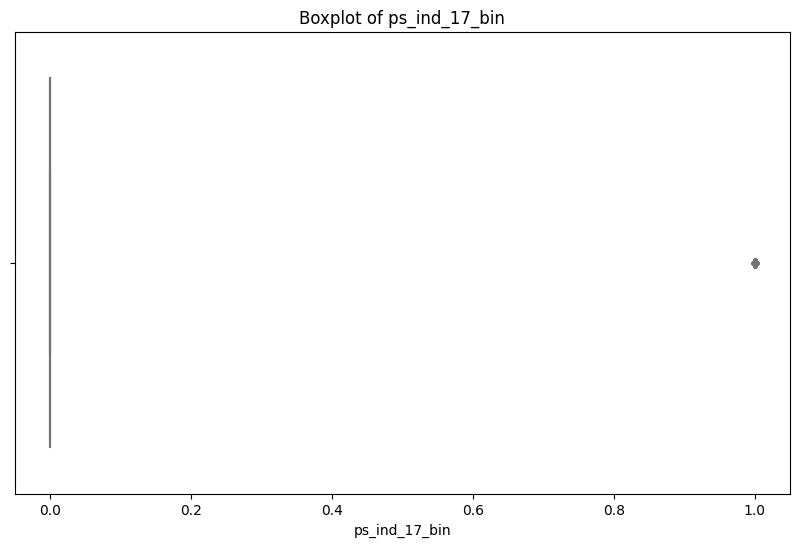

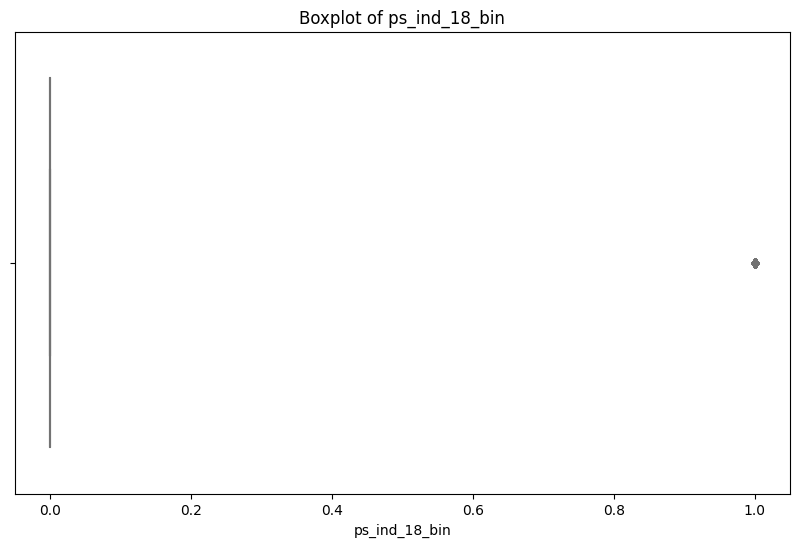

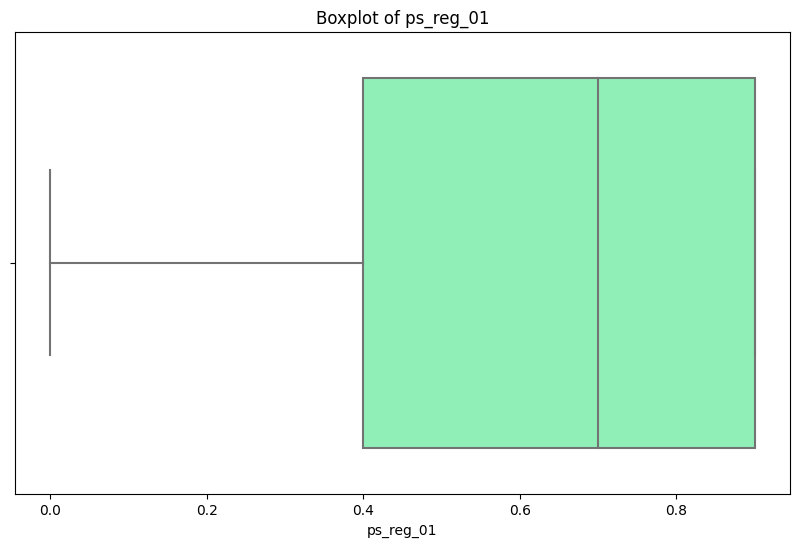

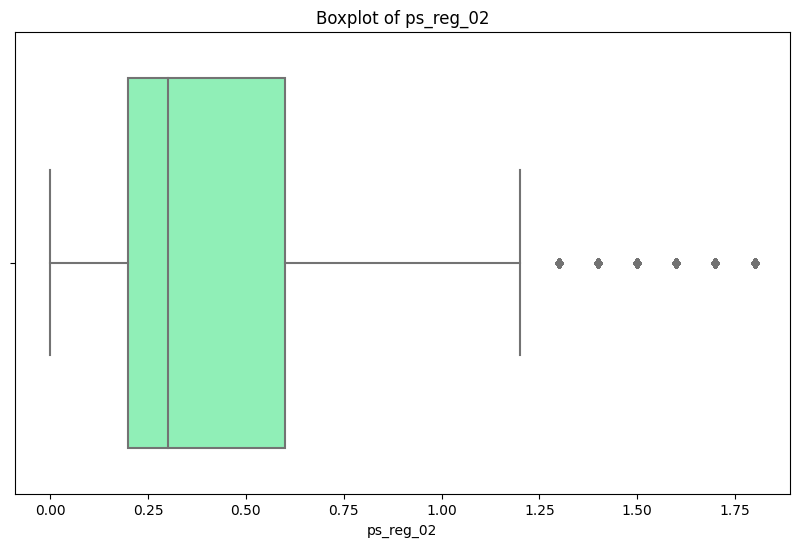

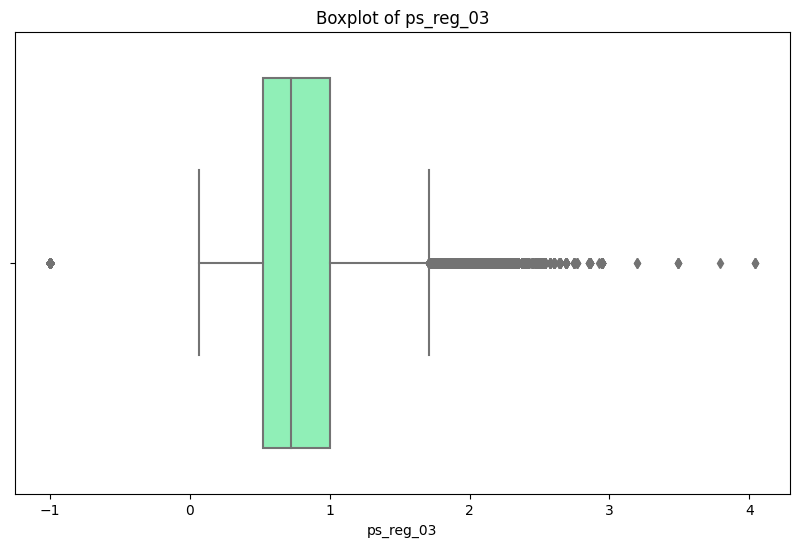

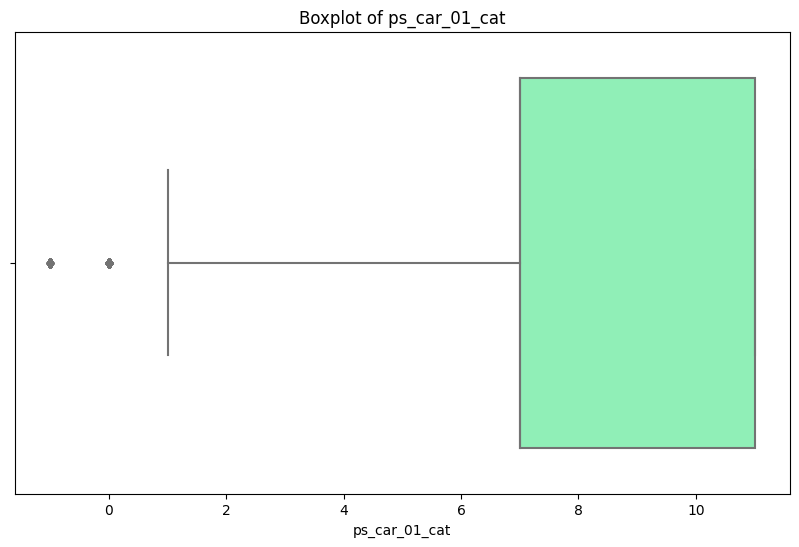

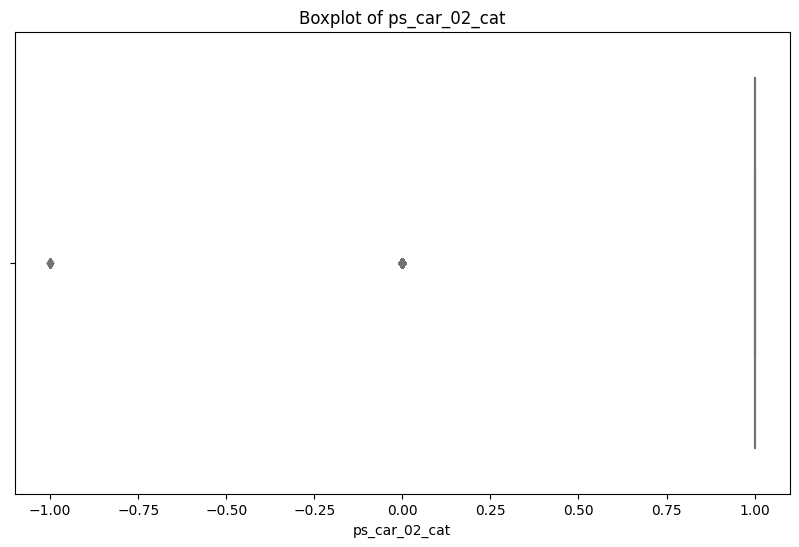

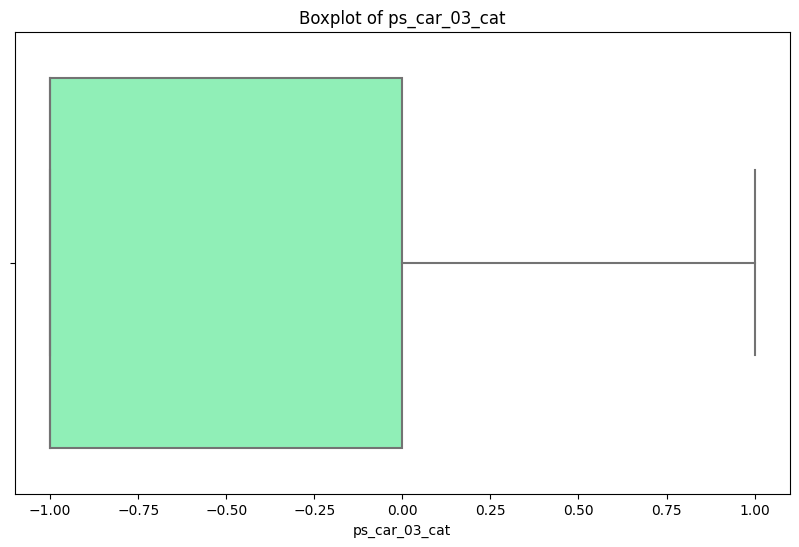

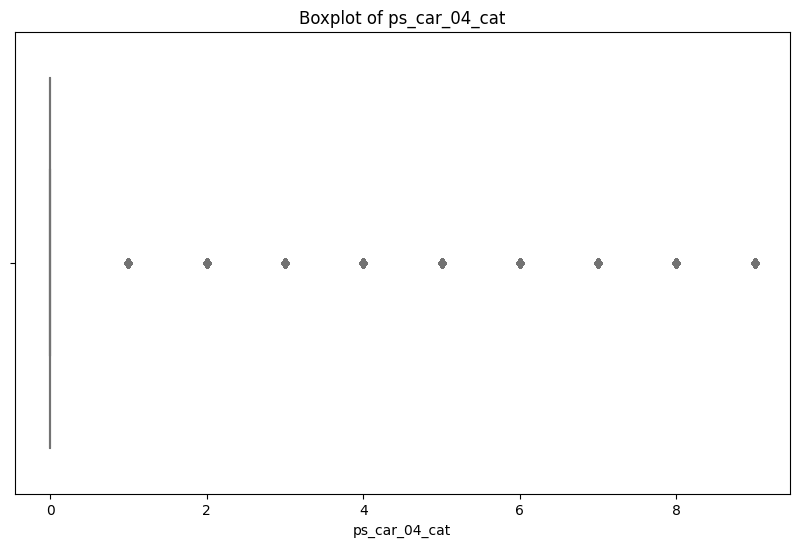

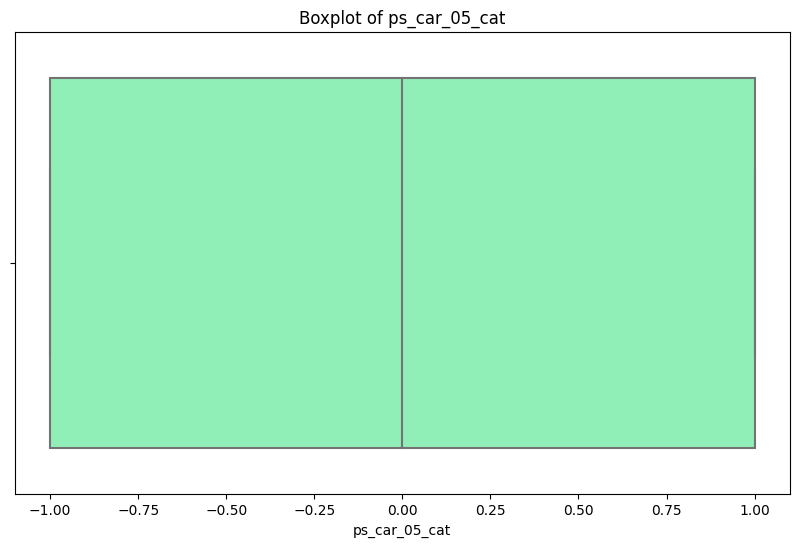

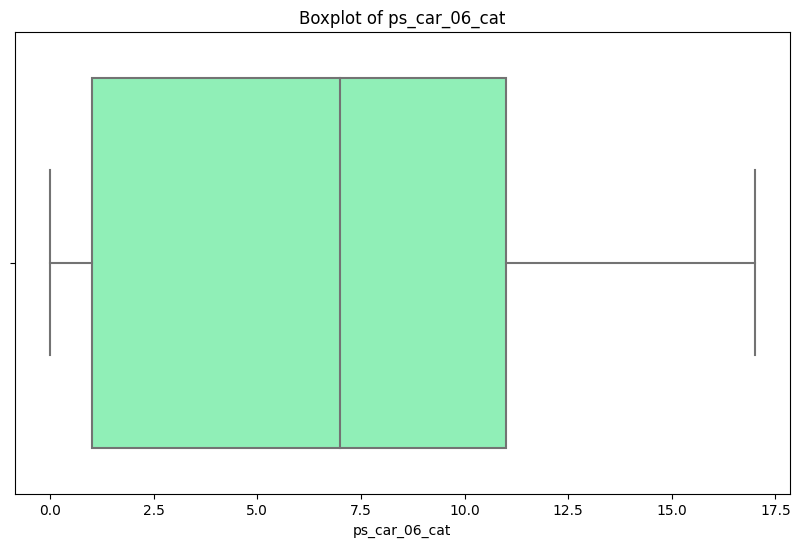

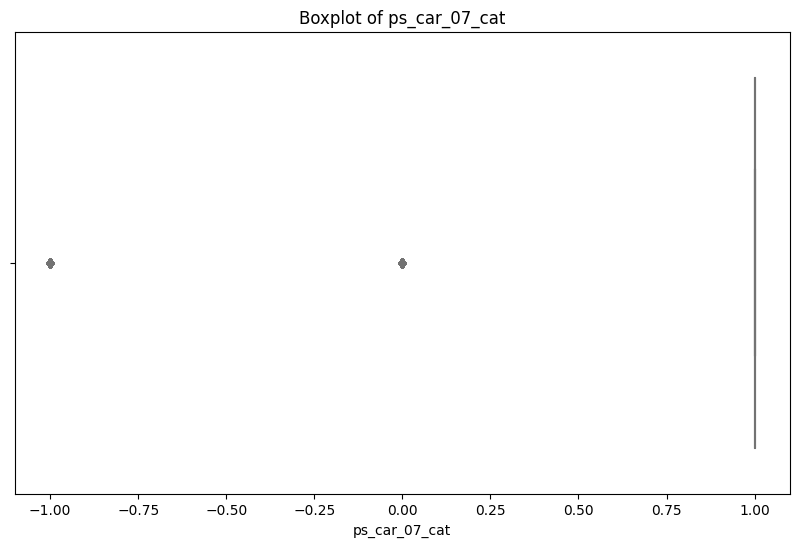

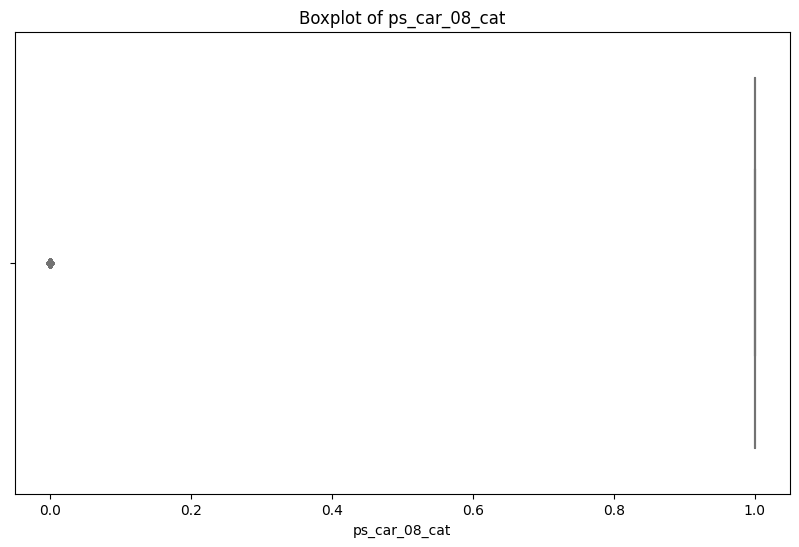

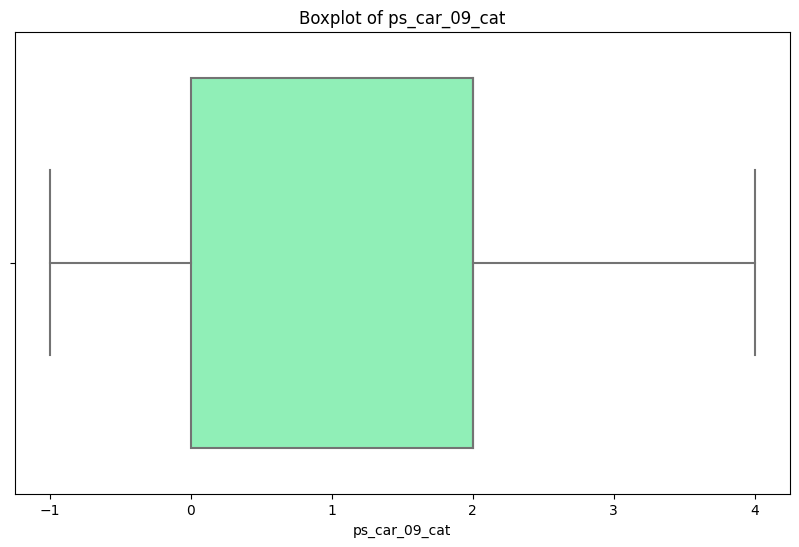

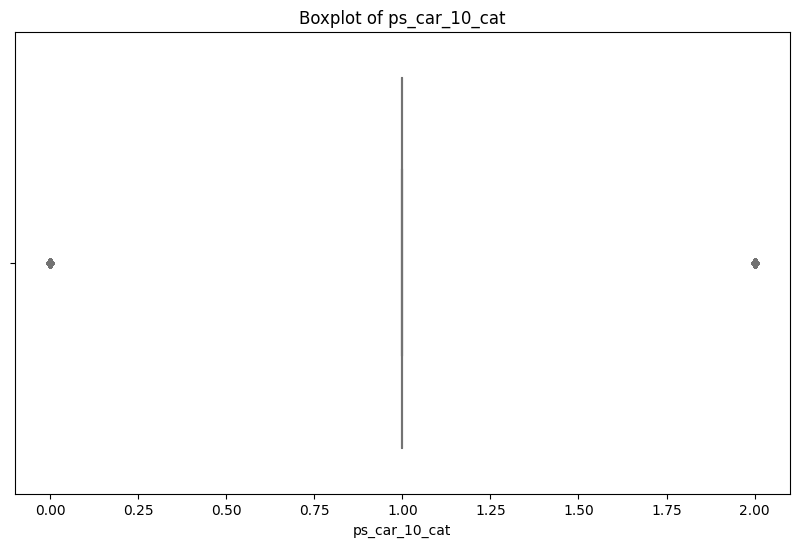

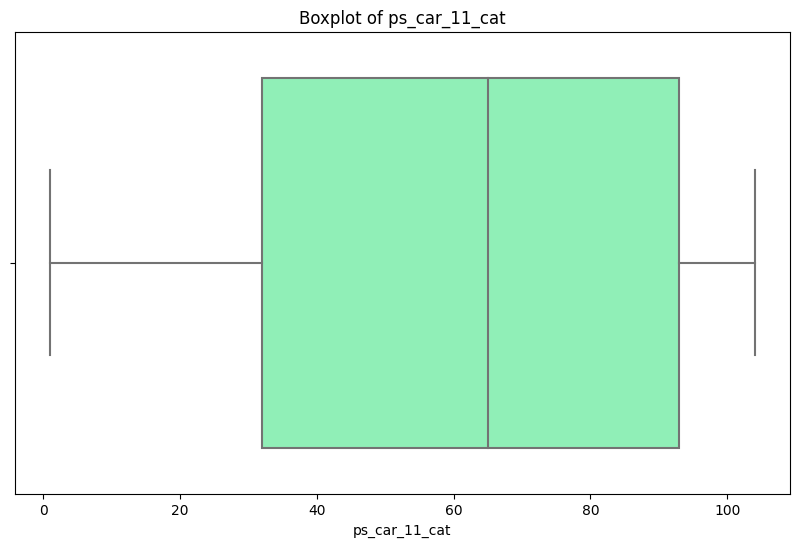

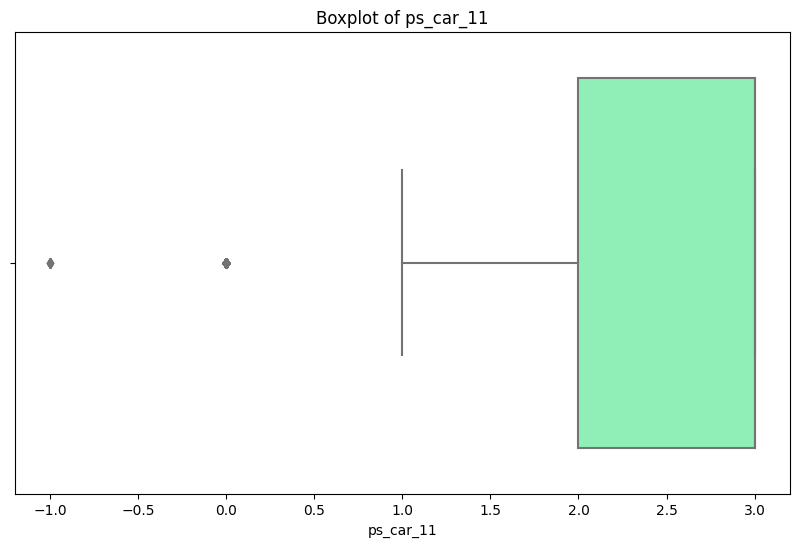

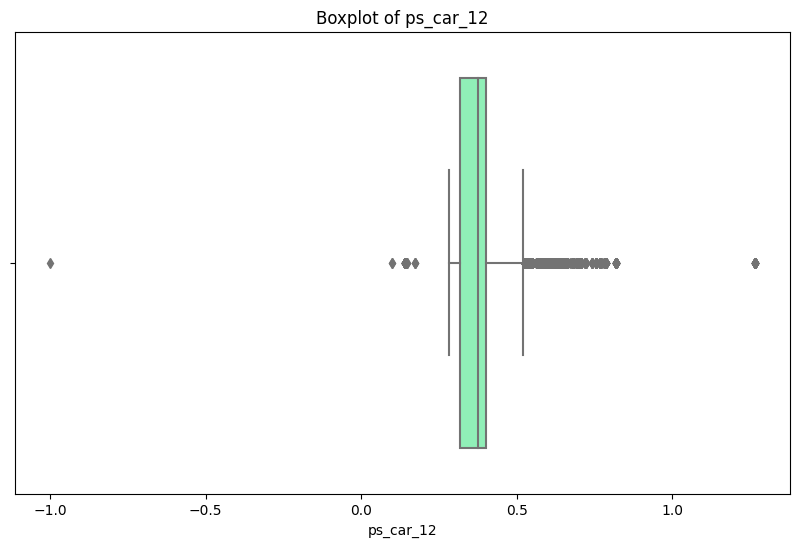

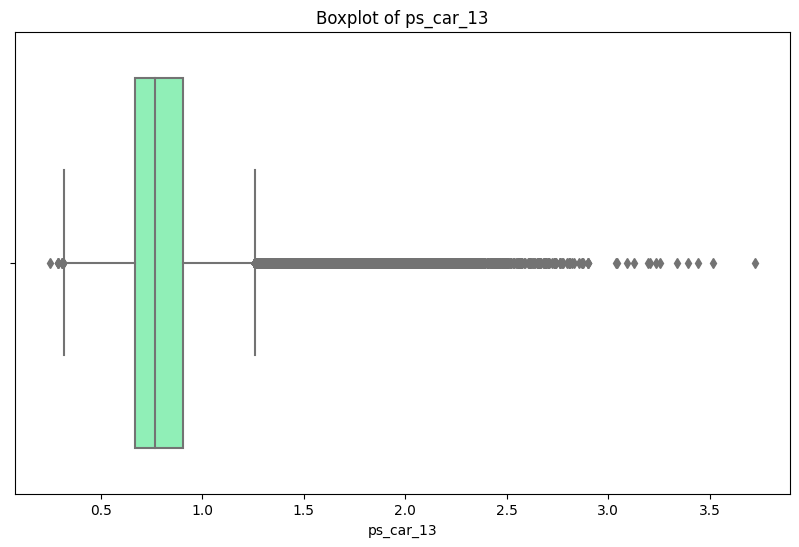

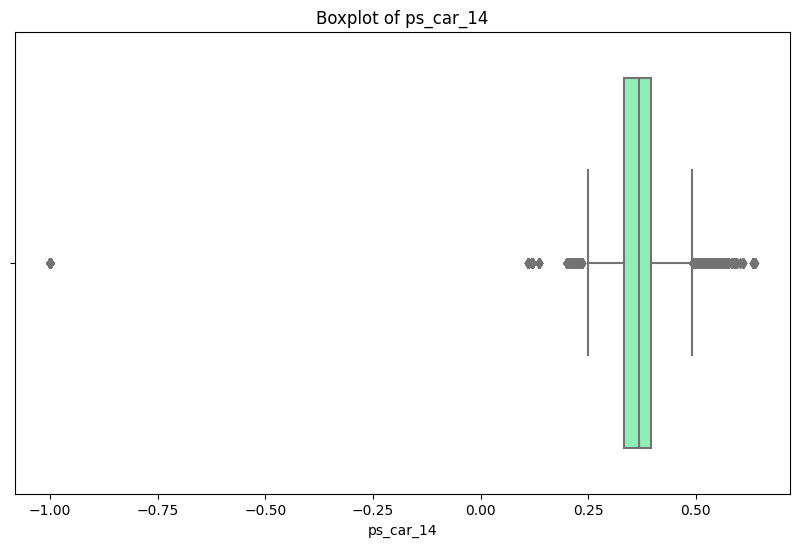

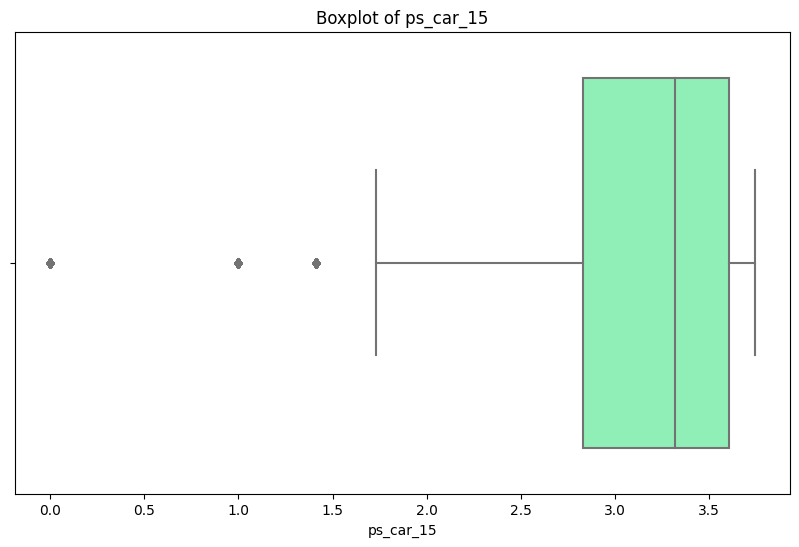

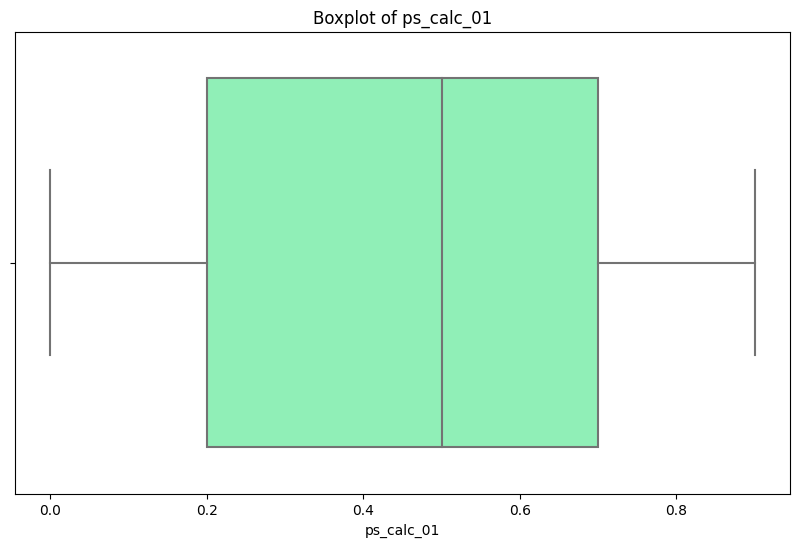

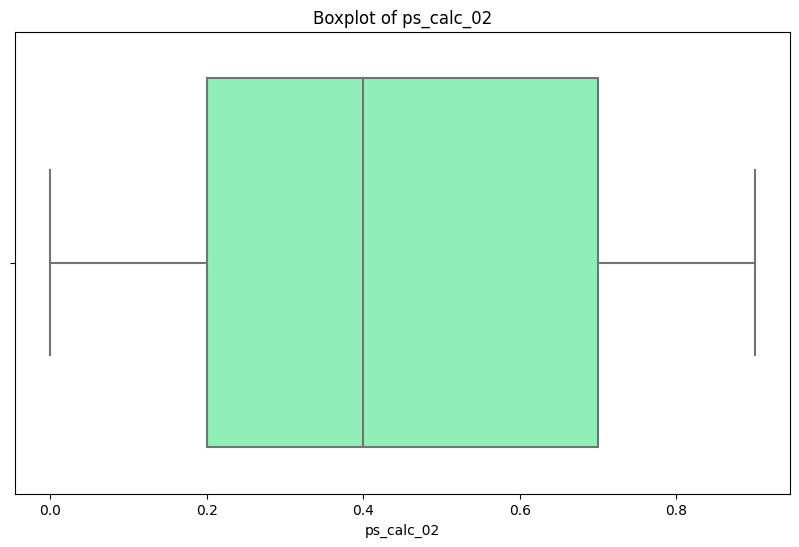

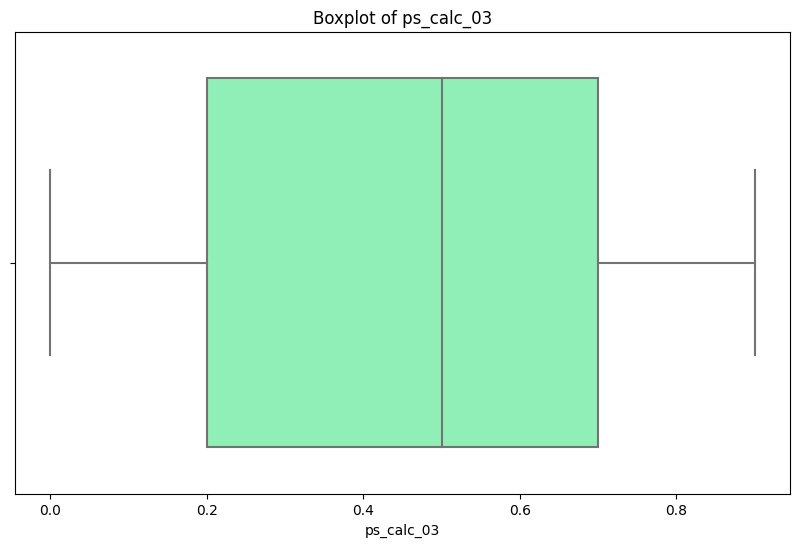

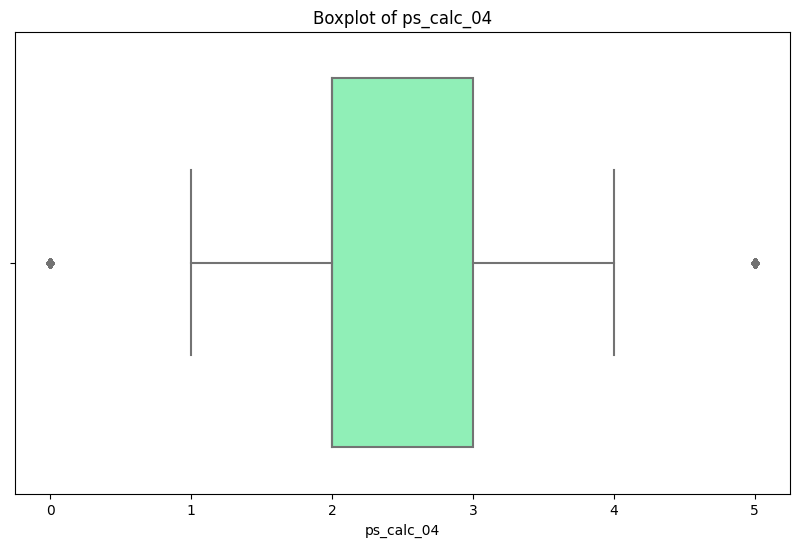

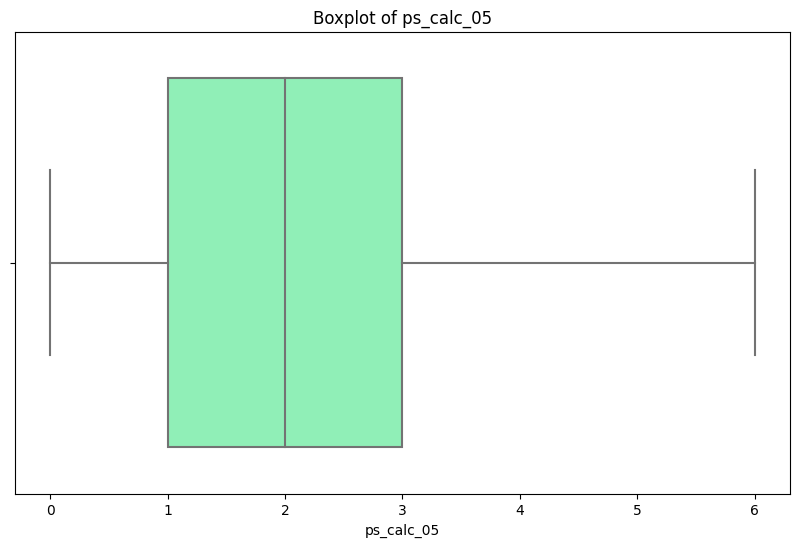

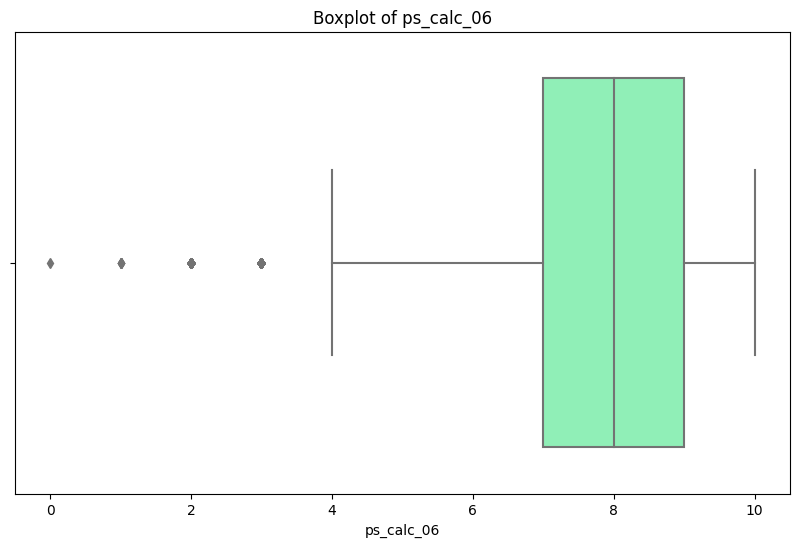

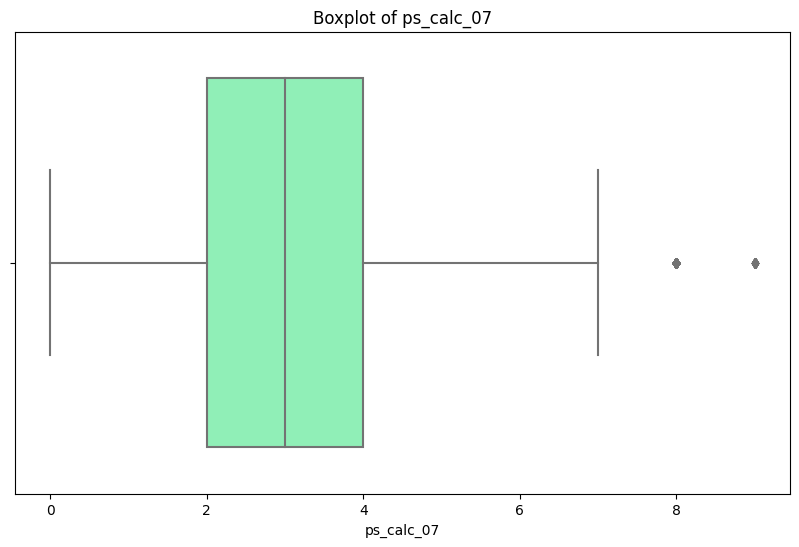

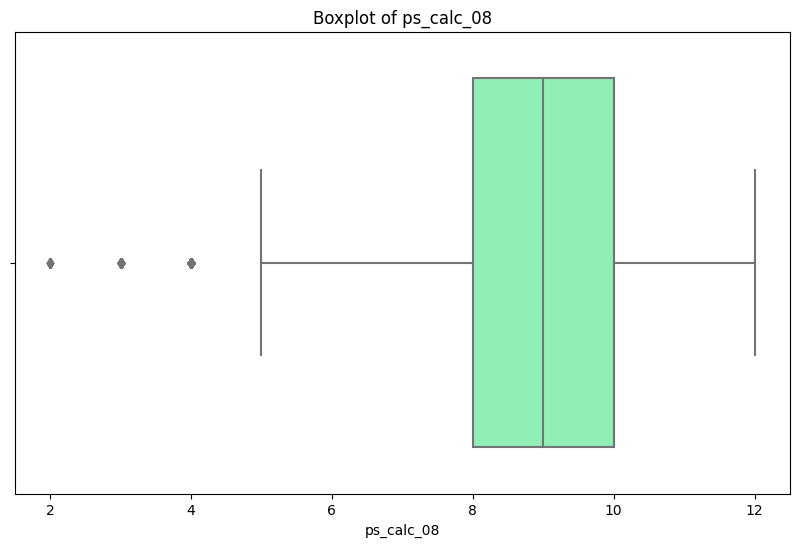

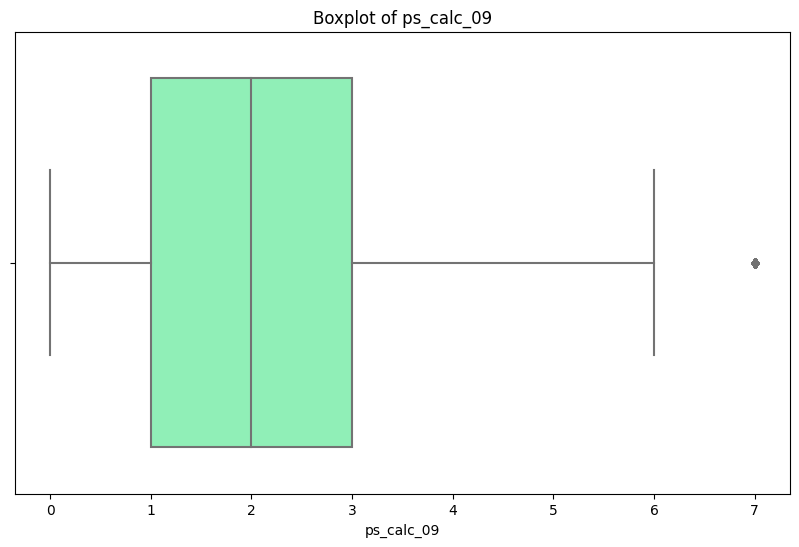

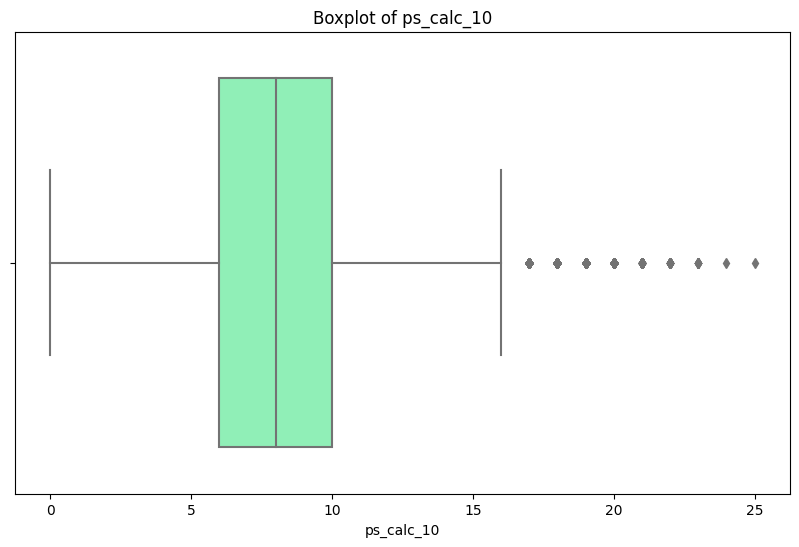

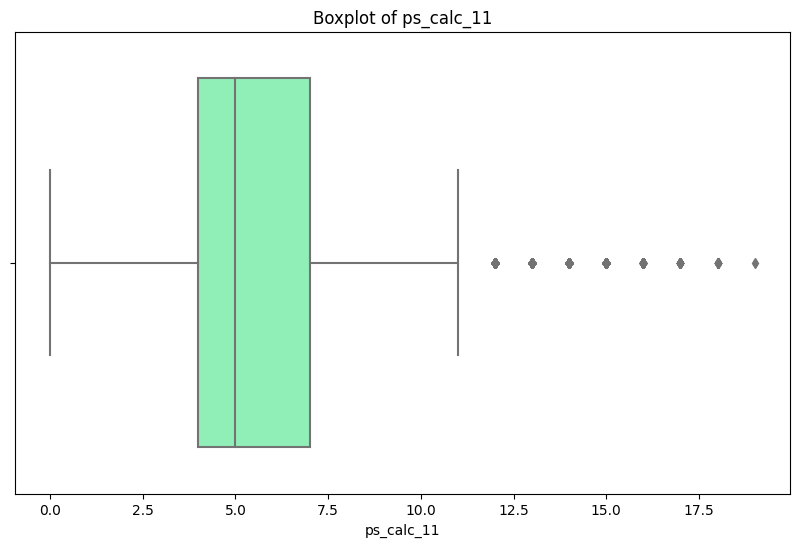

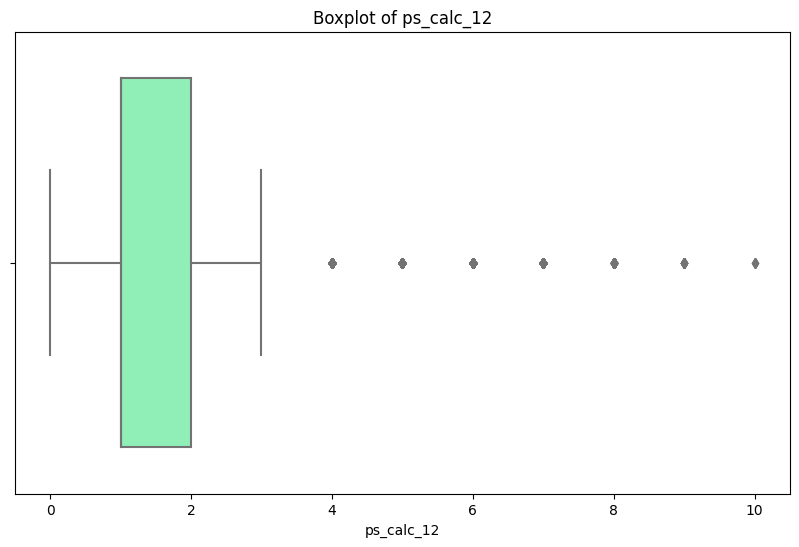

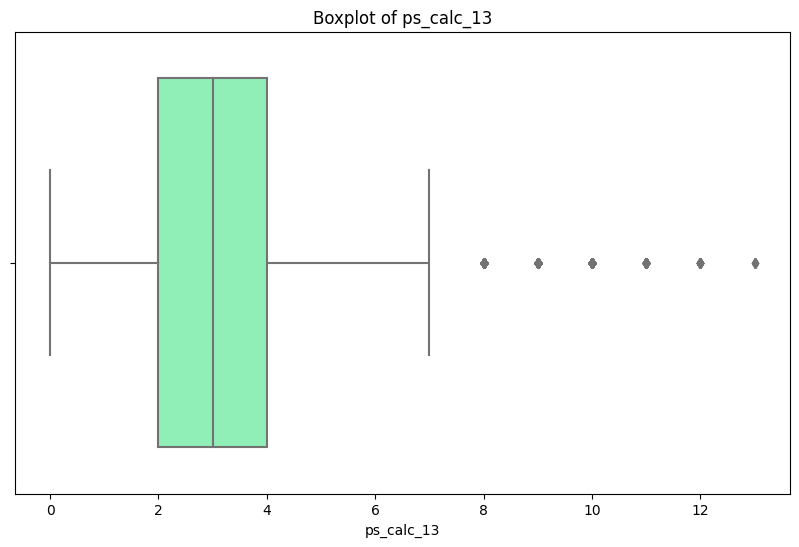

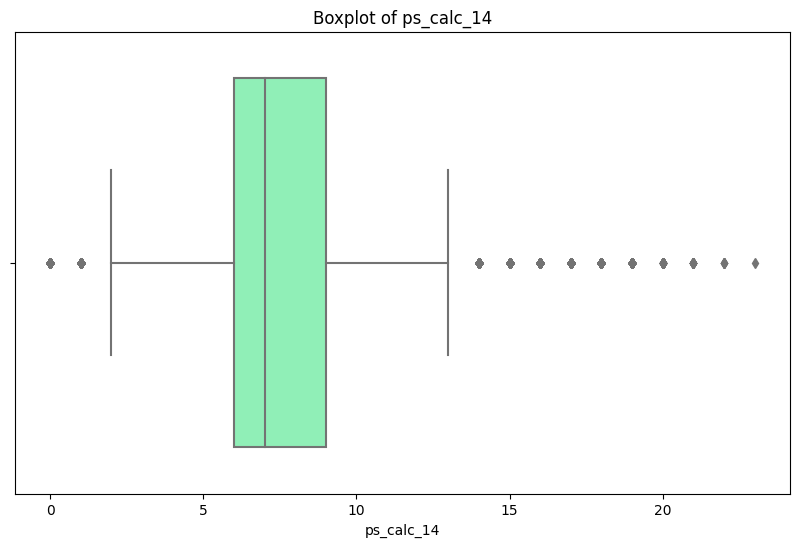

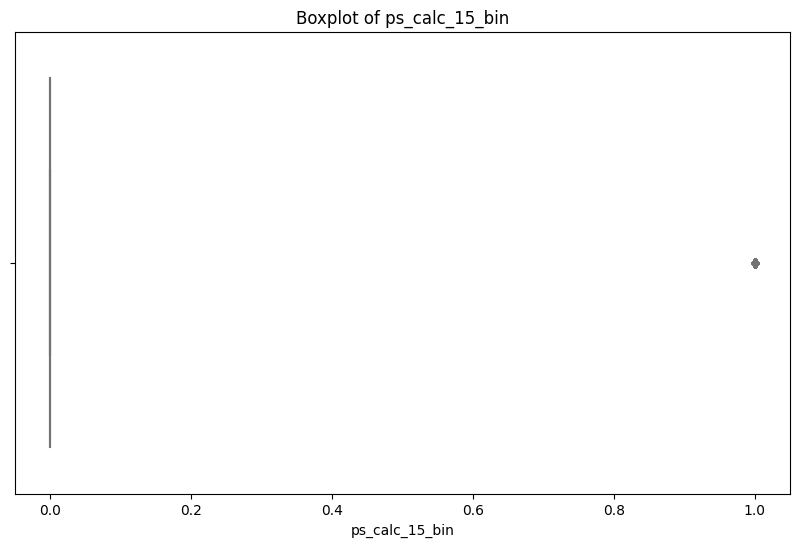

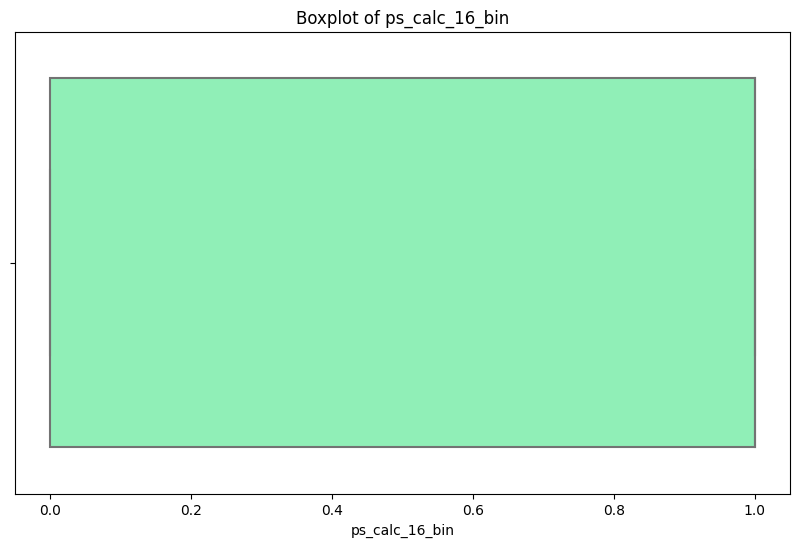

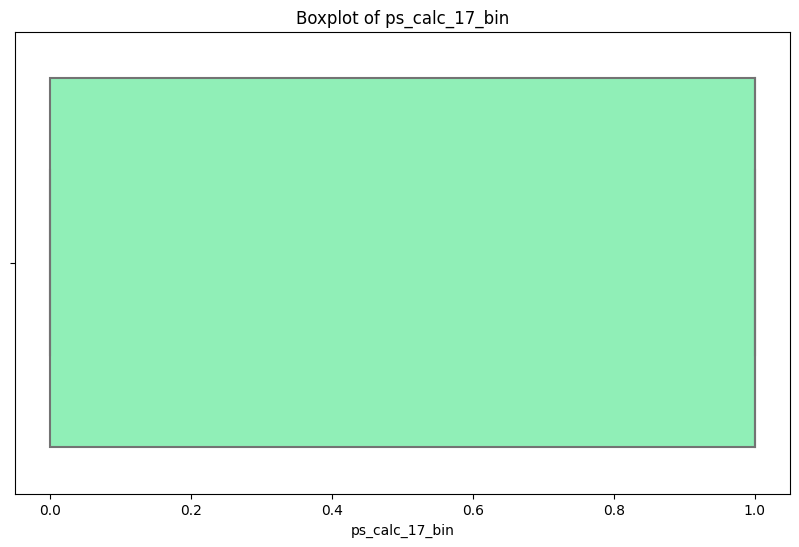

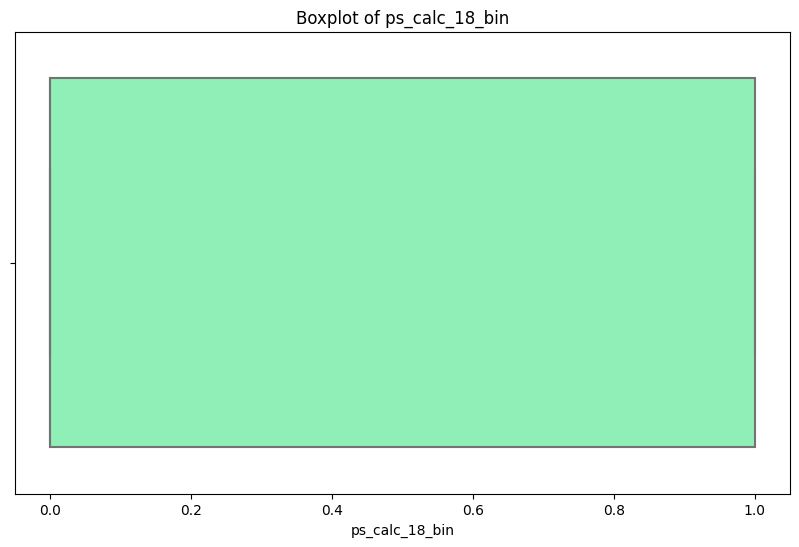

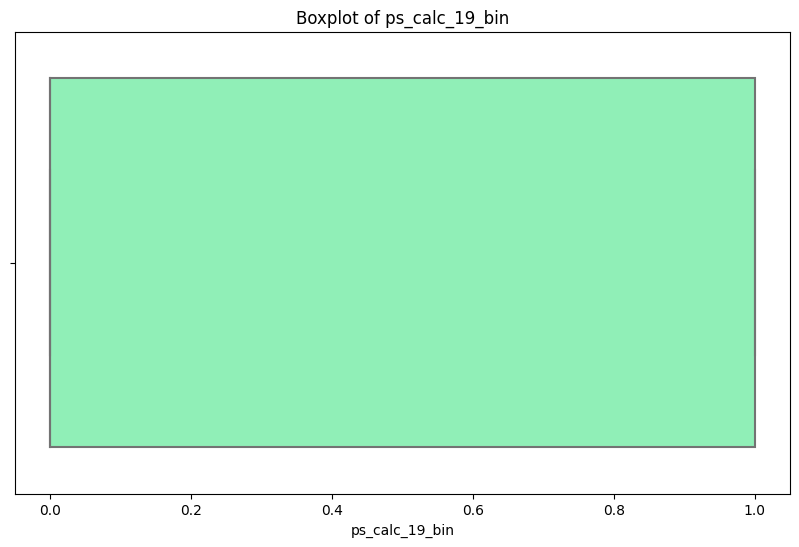

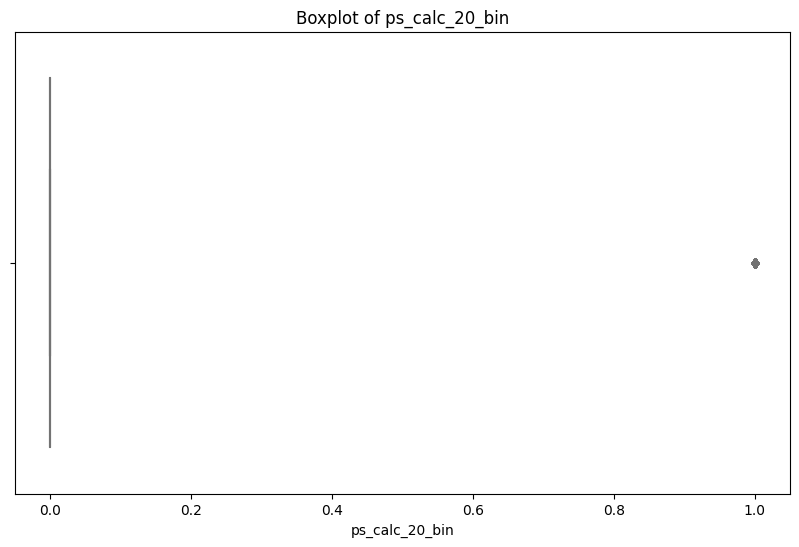

In [9]:


# Filter numeric columns
numeric_cols =df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()



DataFrame after replacing outliers with values close to the boundary:
        target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0            0          2            2.0          5              1   
1            0          1            1.0          7              0   
2            0          5            3.5          9              1   
3            0          0            1.0          2              0   
4            0          0            2.0          0              1   
...        ...        ...            ...        ...            ...   
595207       0          3            1.0         10              0   
595208       0          5            1.0          3              0   
595209       0          1            1.0         10              0   
595210       0          5            2.0          3              1   
595211       0          0            1.0          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                  

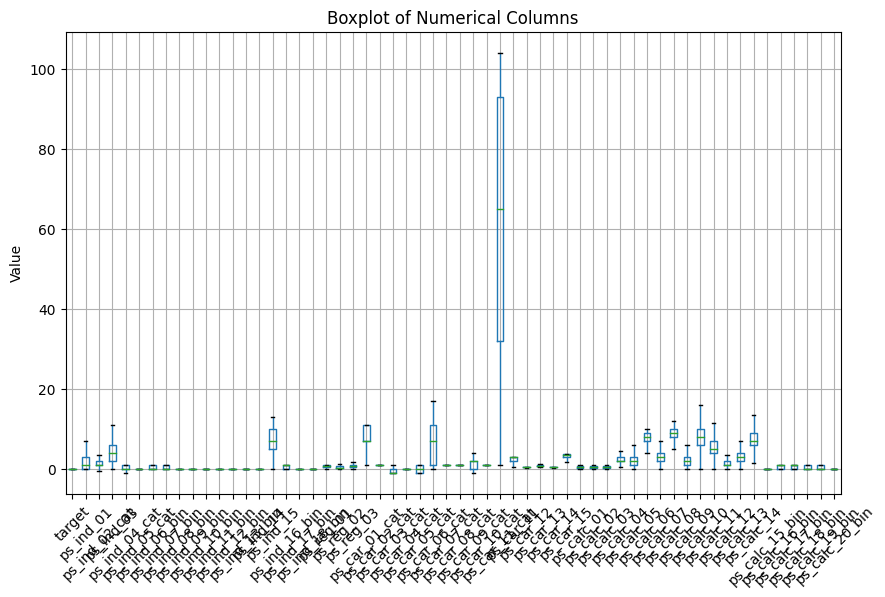

DataFrame after removing outliers using box plot method:
        target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0            0          2            2.0          5              1   
1            0          1            1.0          7              0   
2            0          5            3.5          9              1   
3            0          0            1.0          2              0   
4            0          0            2.0          0              1   
...        ...        ...            ...        ...            ...   
595207       0          3            1.0         10              0   
595208       0          5            1.0          3              0   
595209       0          1            1.0         10              0   
595210       0          5            2.0          3              1   
595211       0          0            1.0          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0           

In [10]:
def replace_outliers_with_boundary(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with values close to the boundary
    df_outliers_replaced = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    return df_outliers_replaced

# Replace outliers with values close to the boundary
df_outliers_replaced = replace_outliers_with_boundary(df)

print("DataFrame after replacing outliers with values close to the boundary:")
print(df_outliers_replaced)

# Draw boxplots for each numerical column
plt.figure(figsize=(10, 6))
df_outliers_replaced.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

print("DataFrame after removing outliers using box plot method:")
print(df_outliers_replaced)

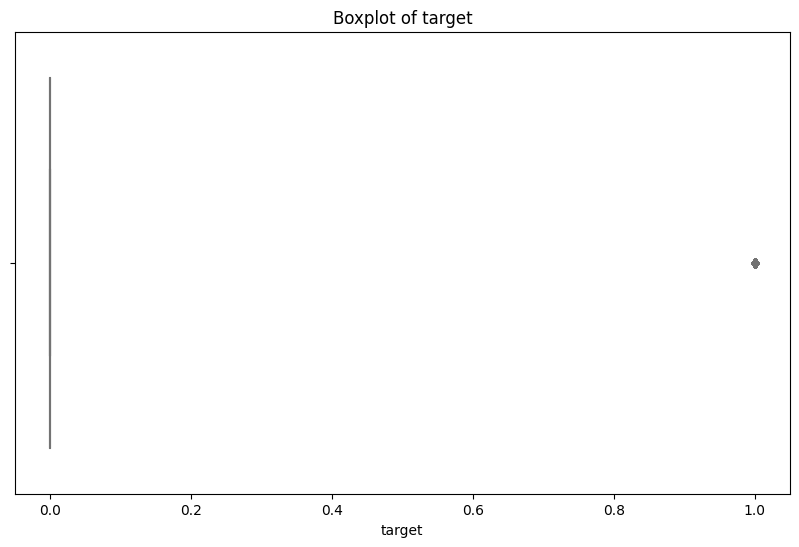

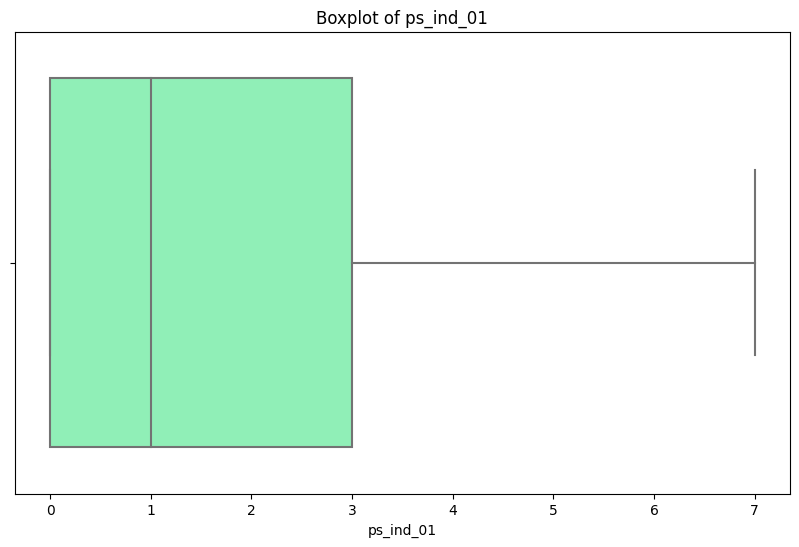

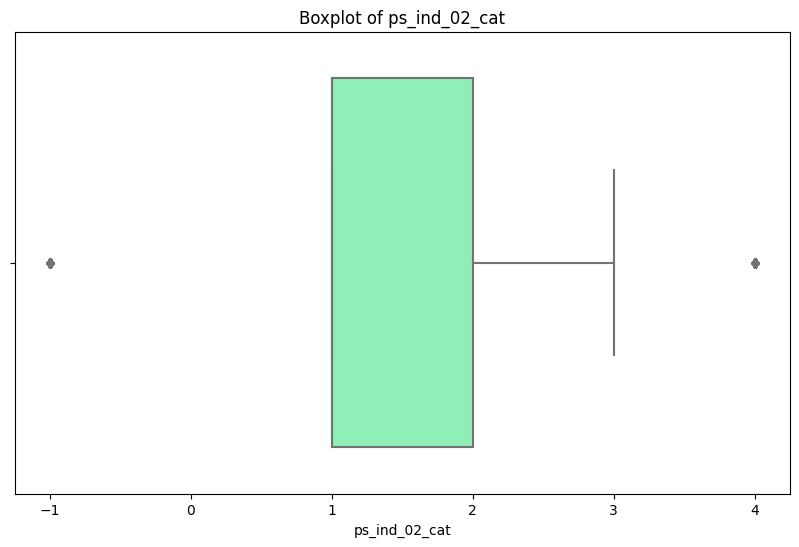

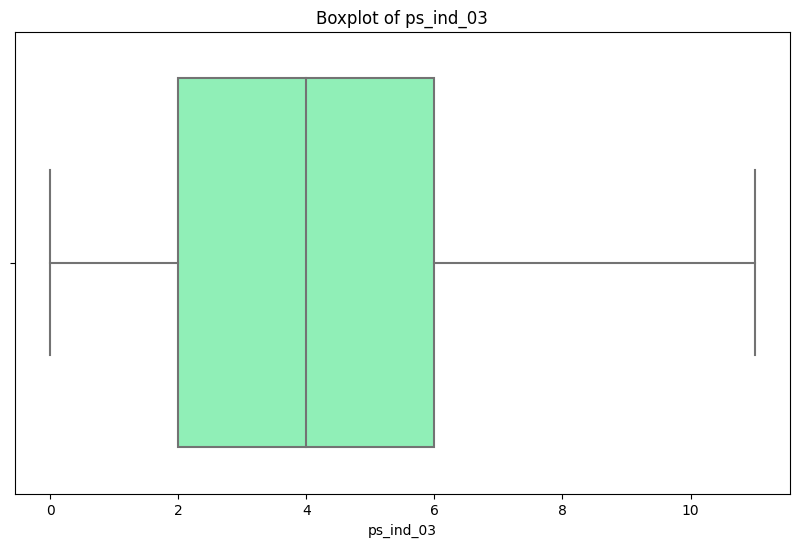

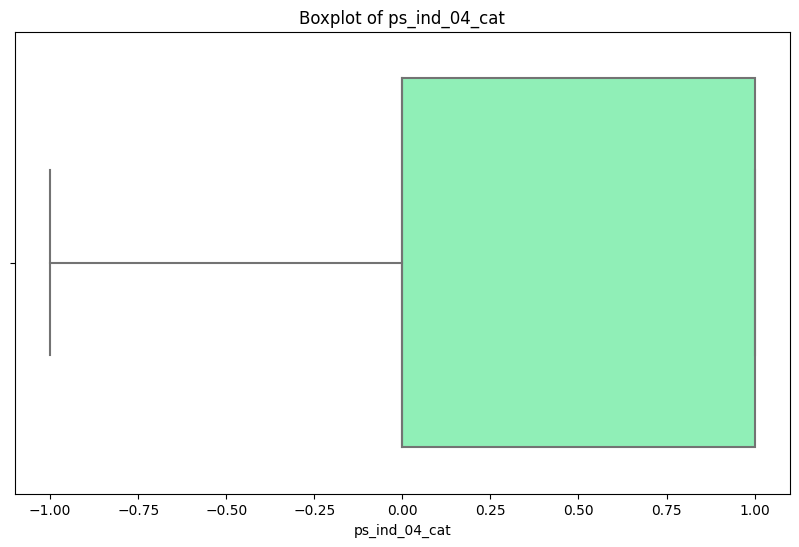

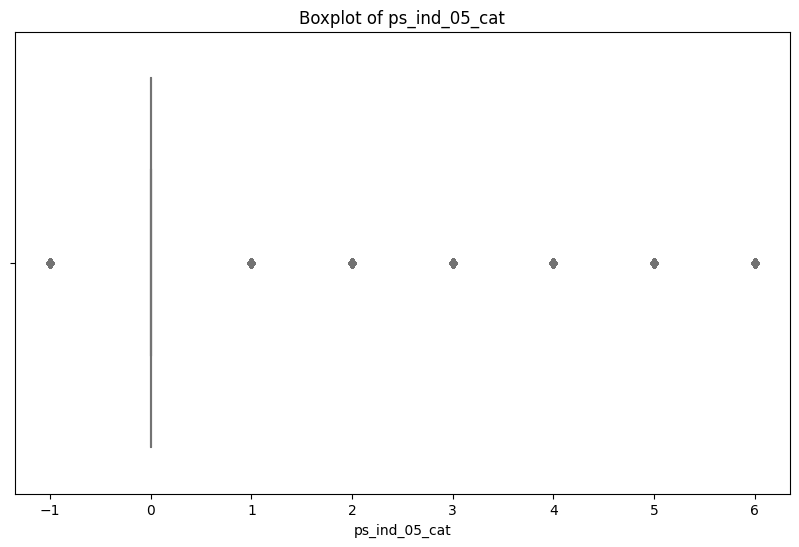

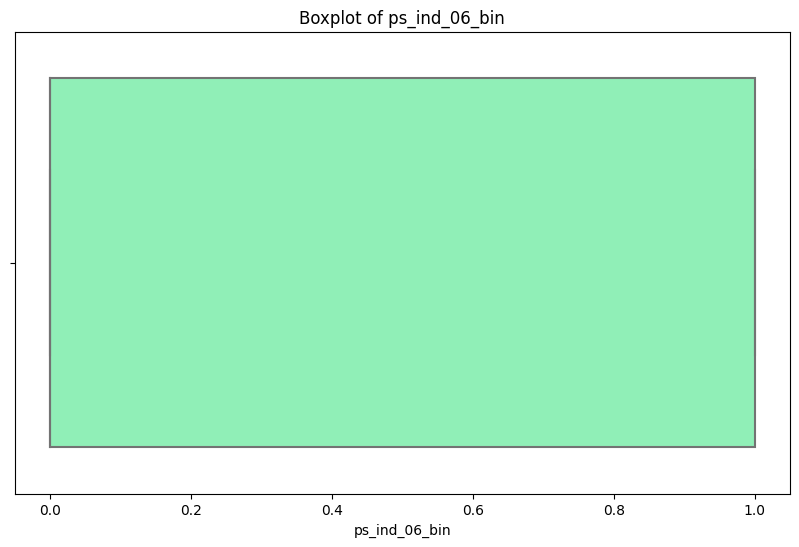

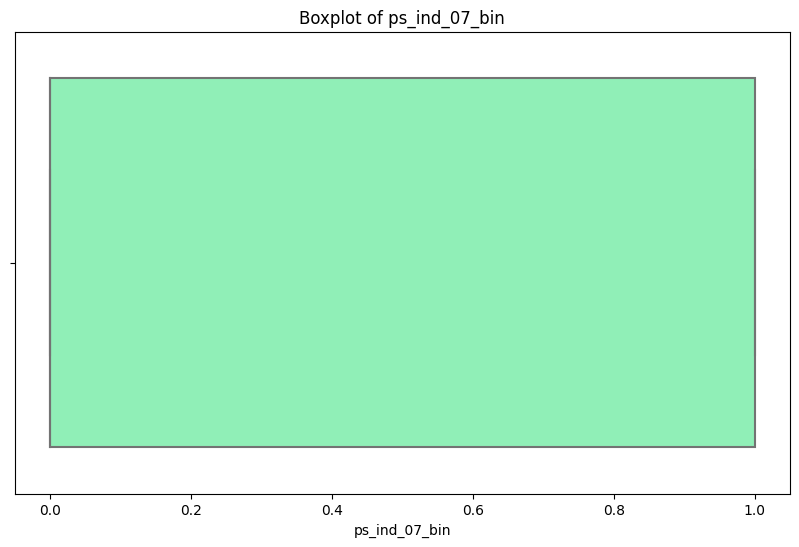

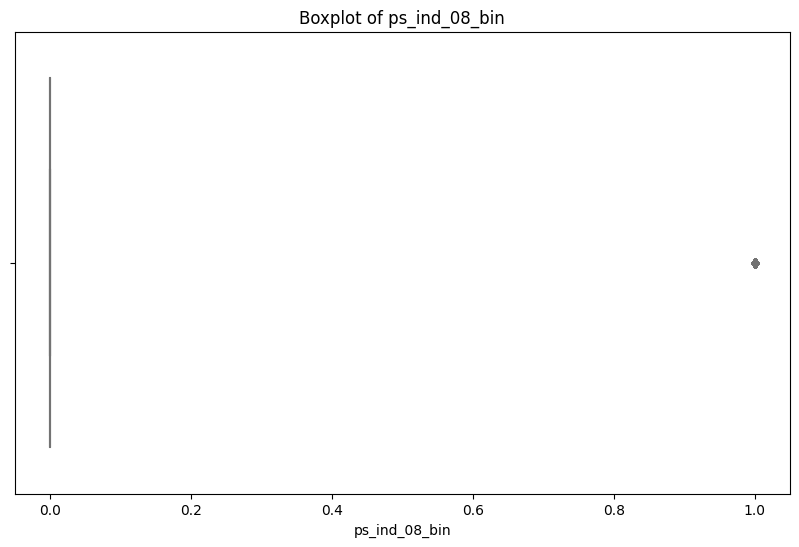

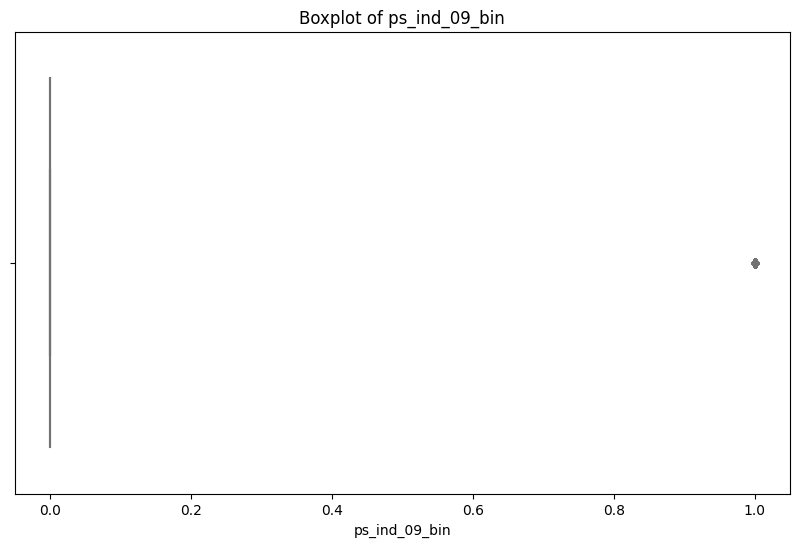

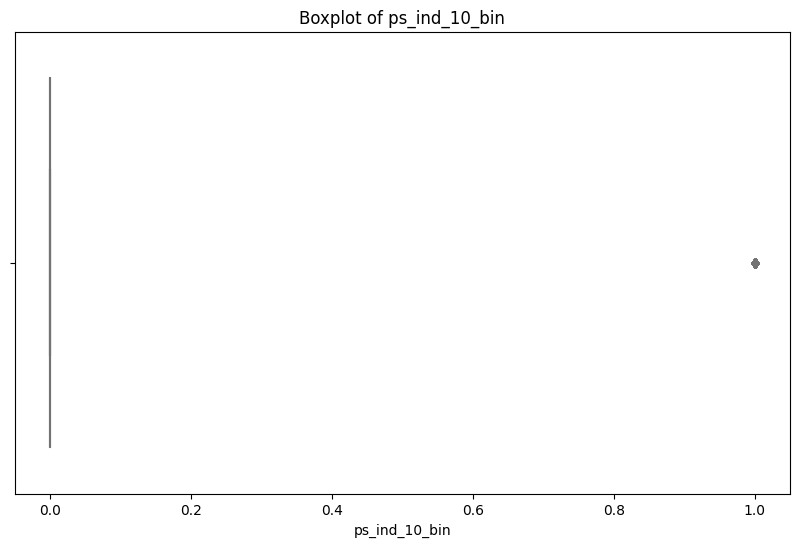

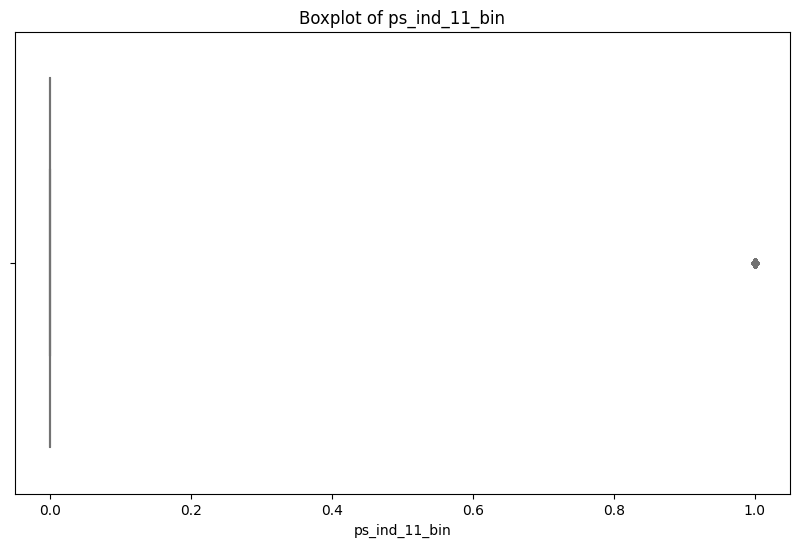

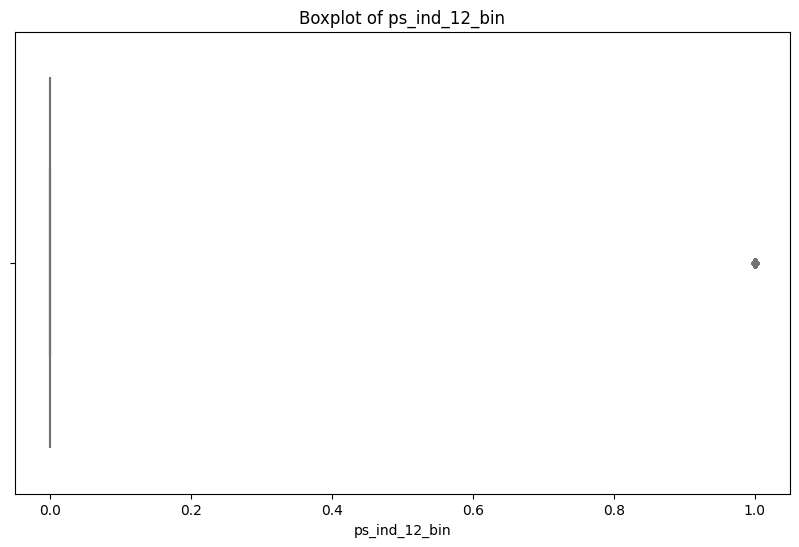

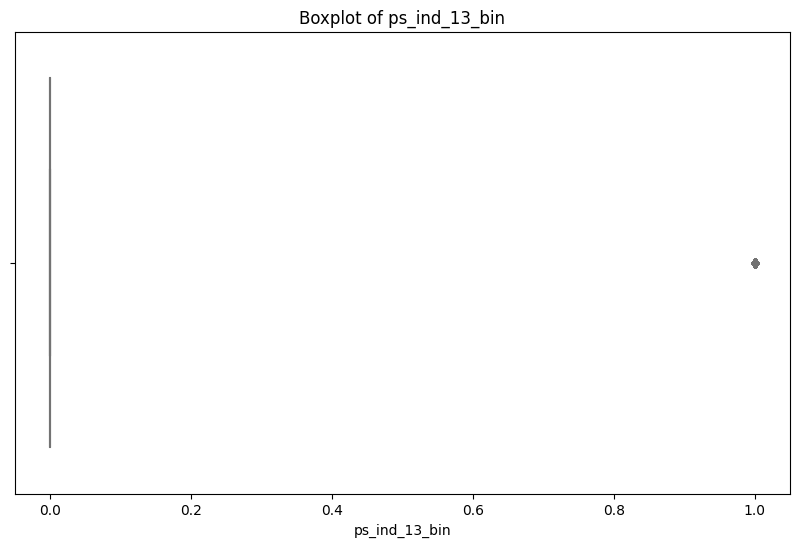

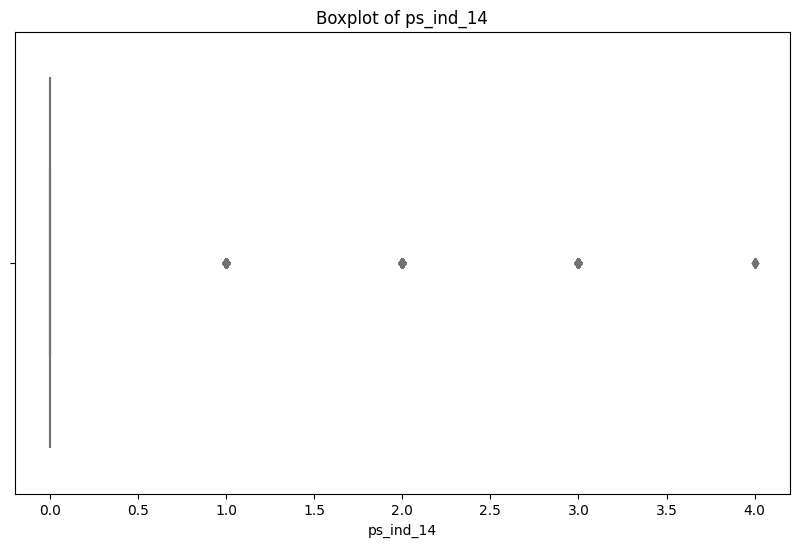

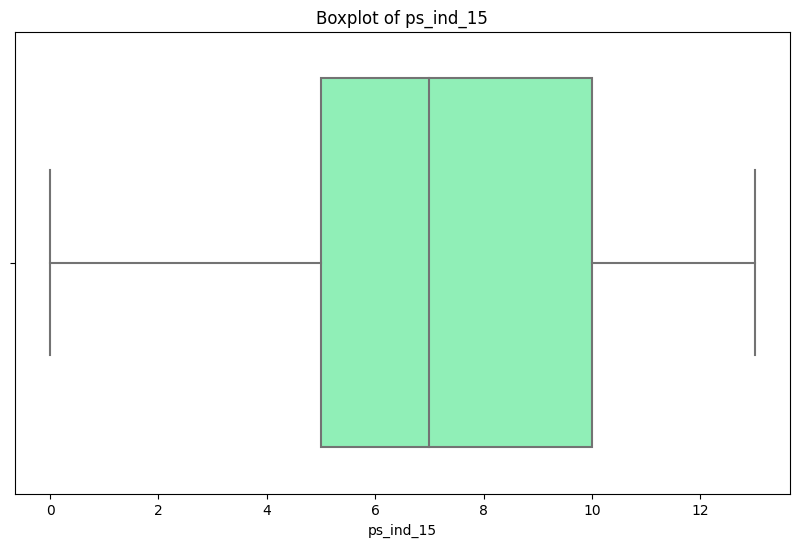

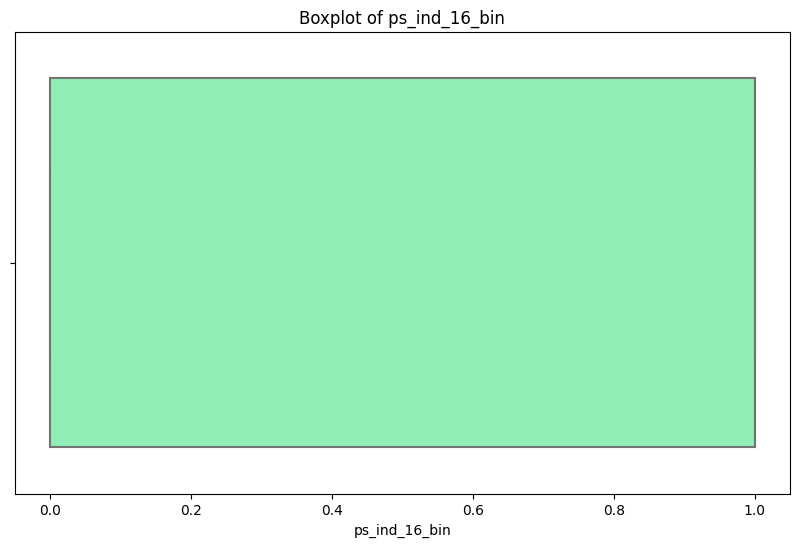

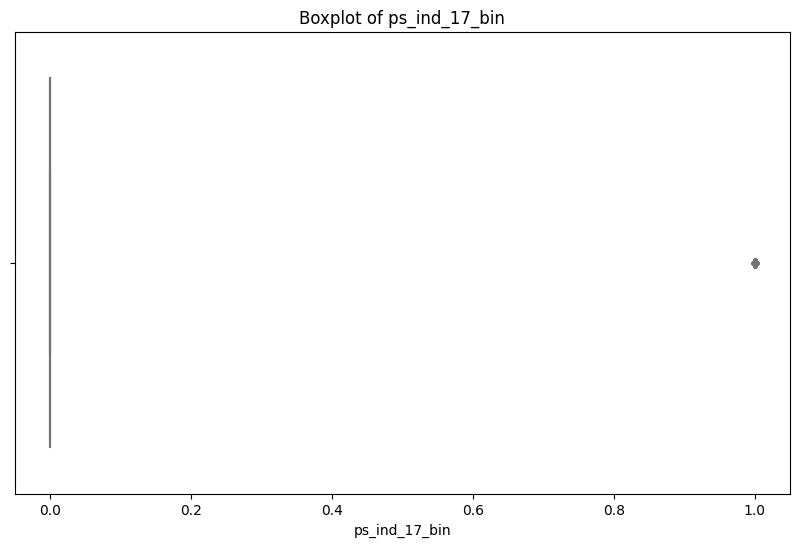

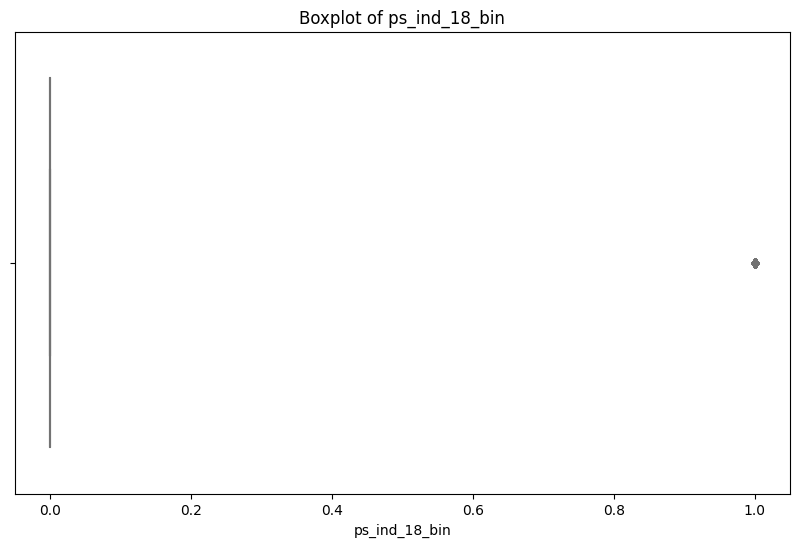

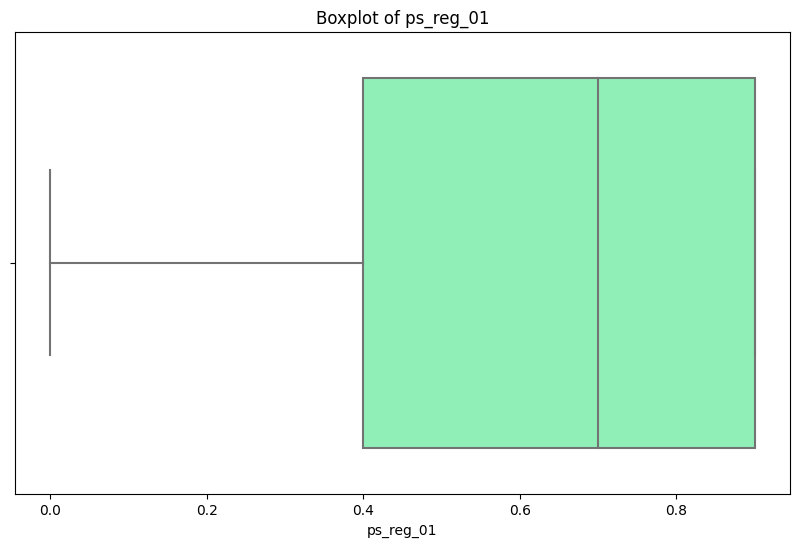

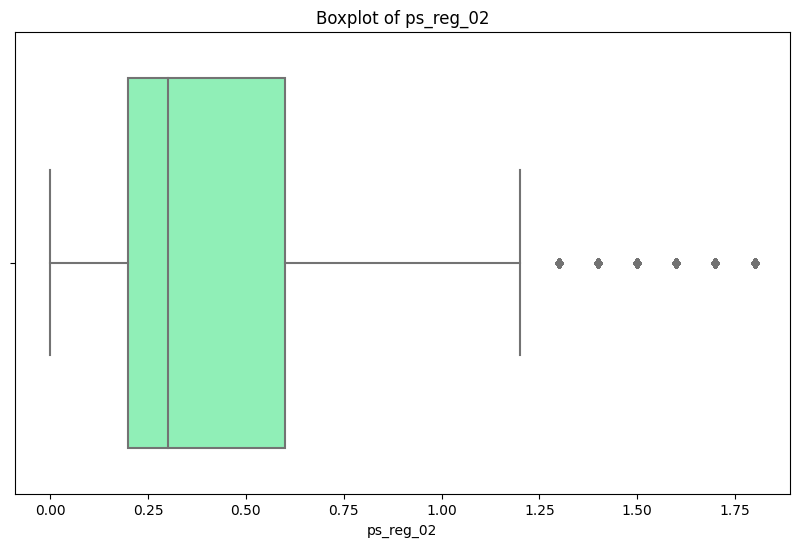

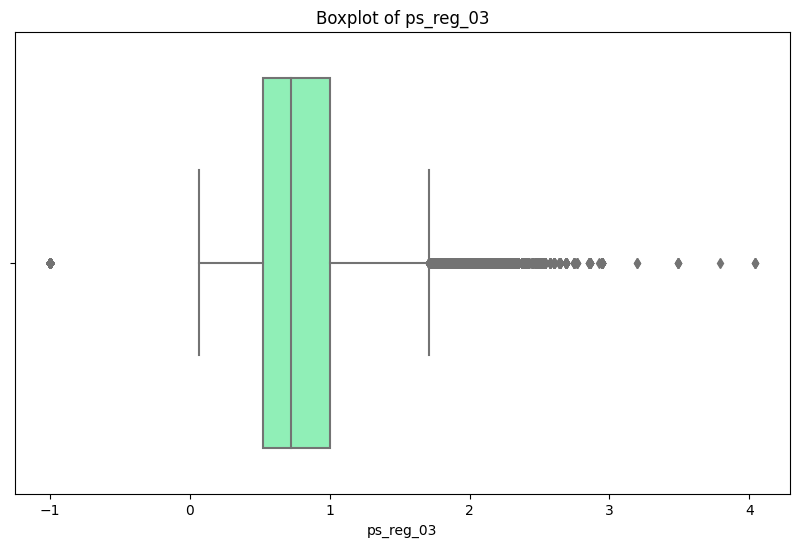

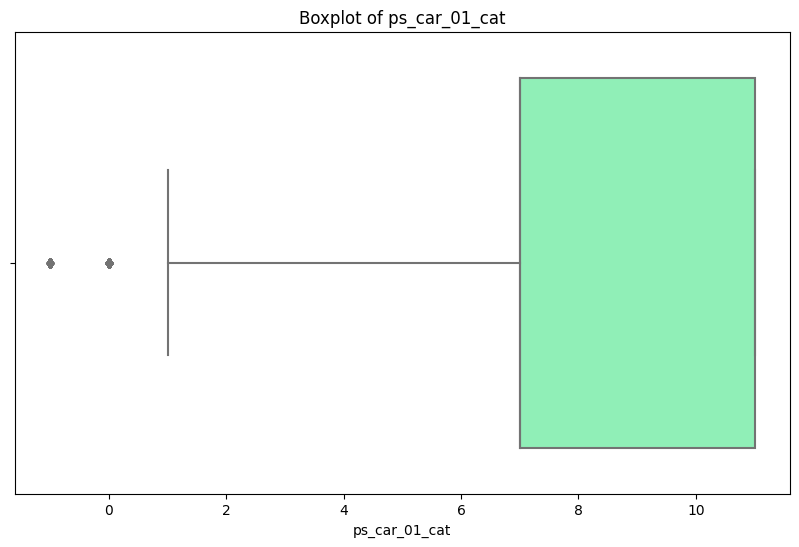

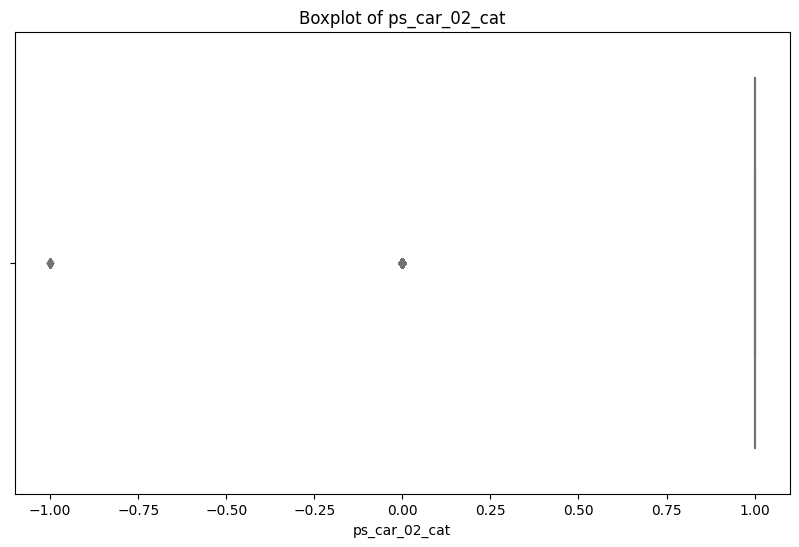

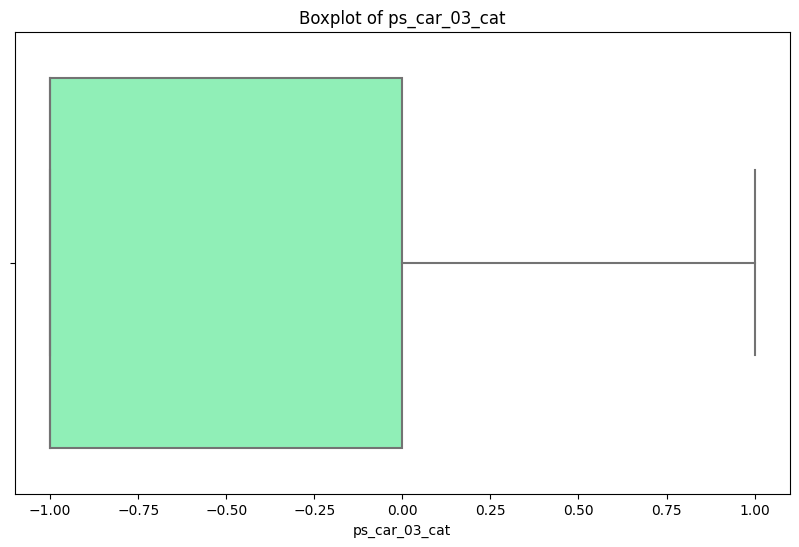

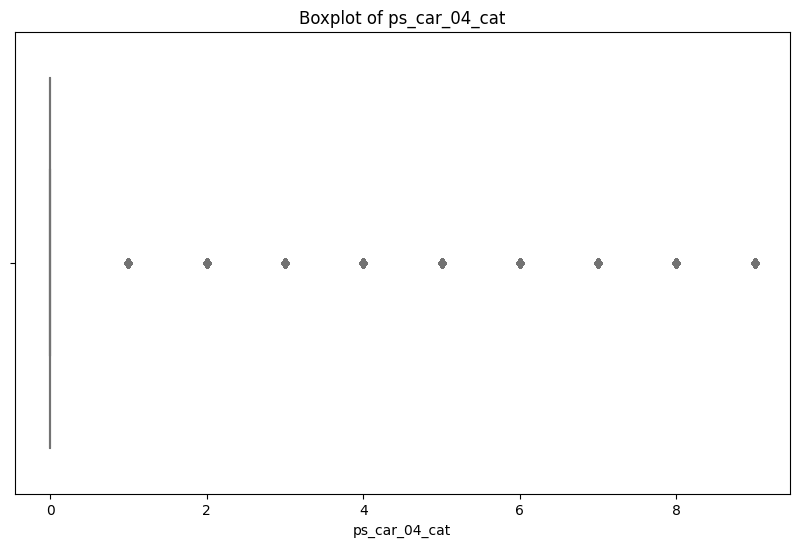

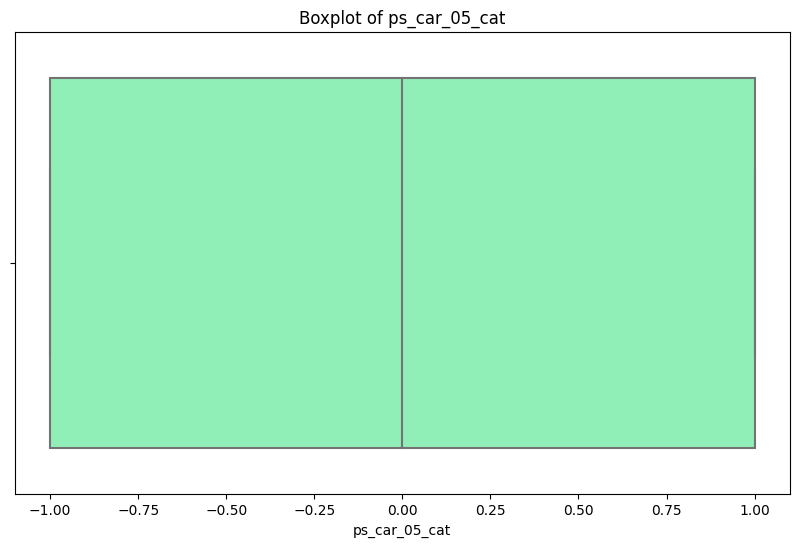

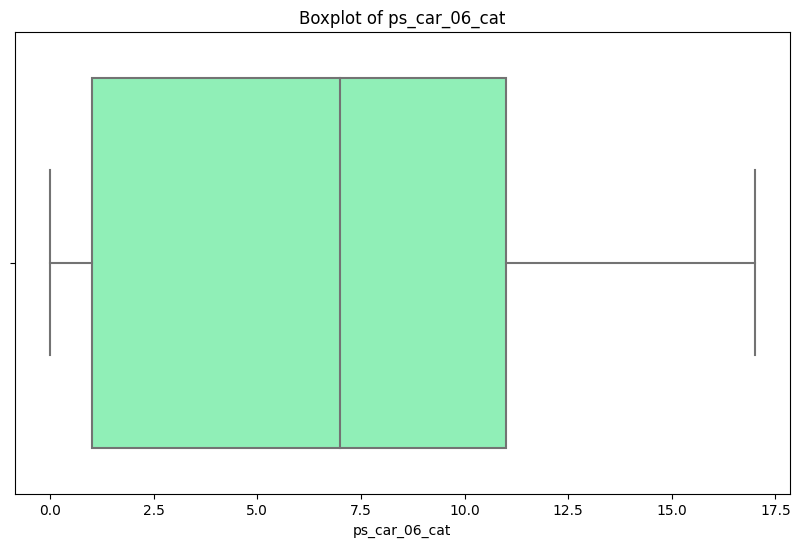

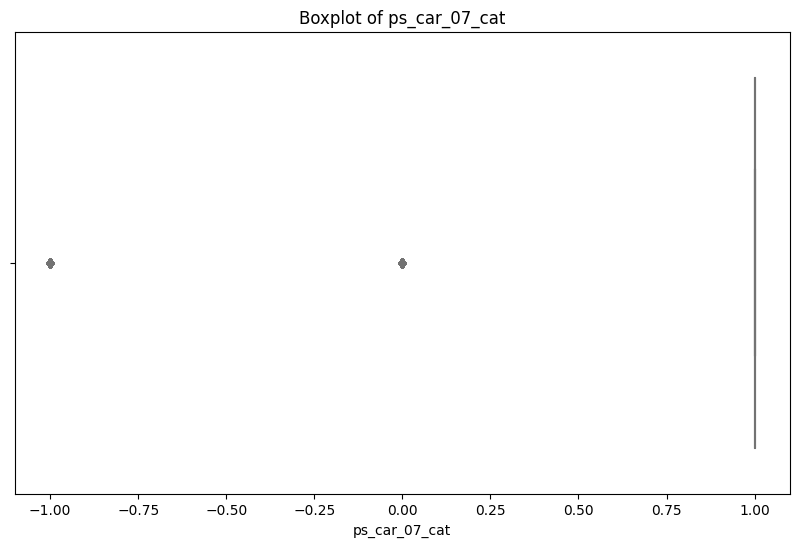

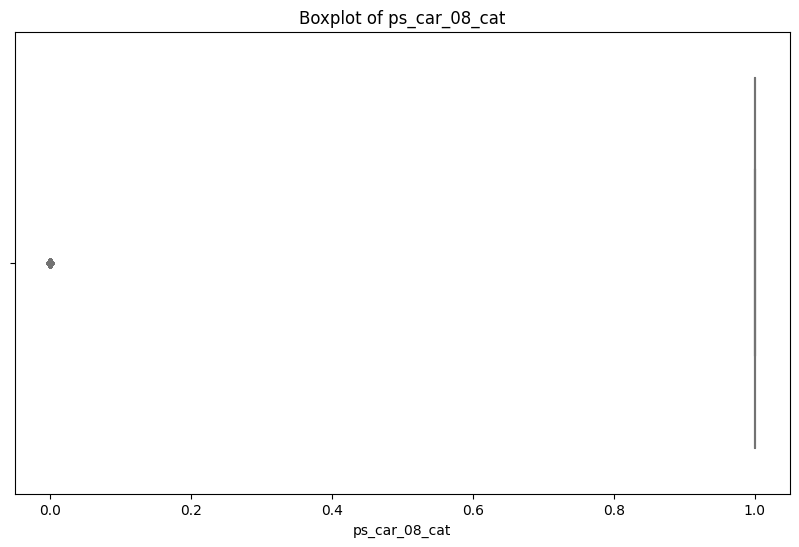

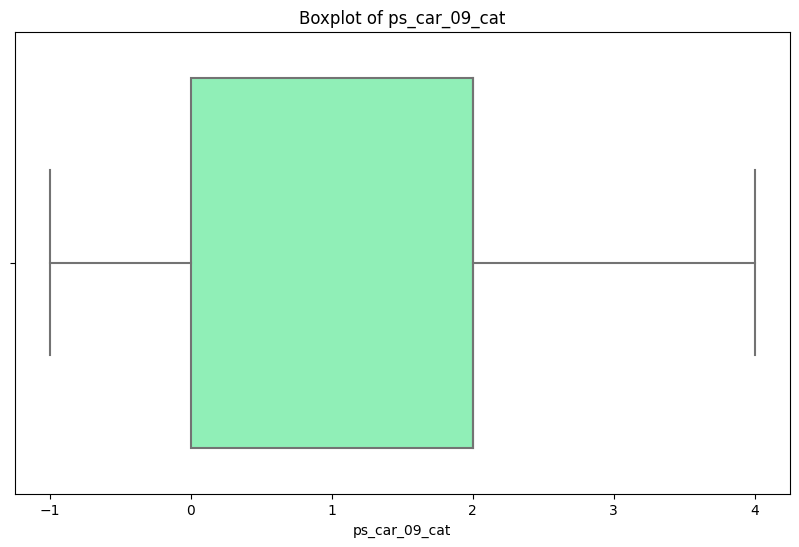

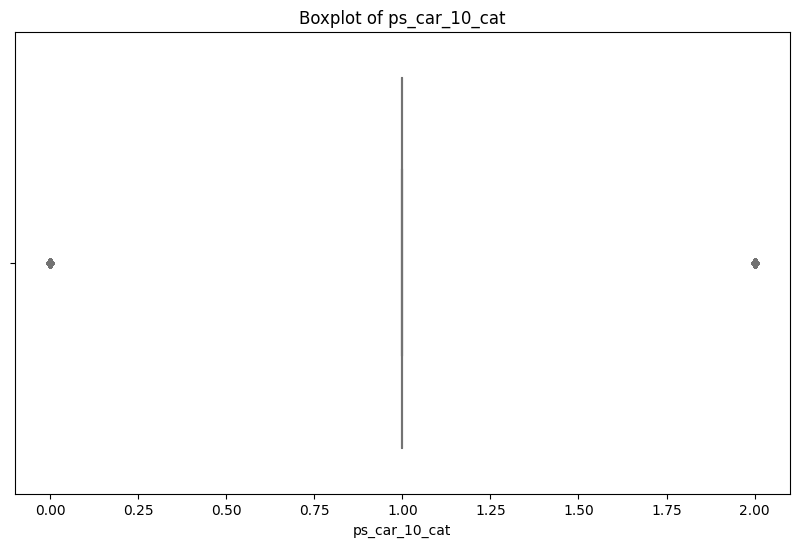

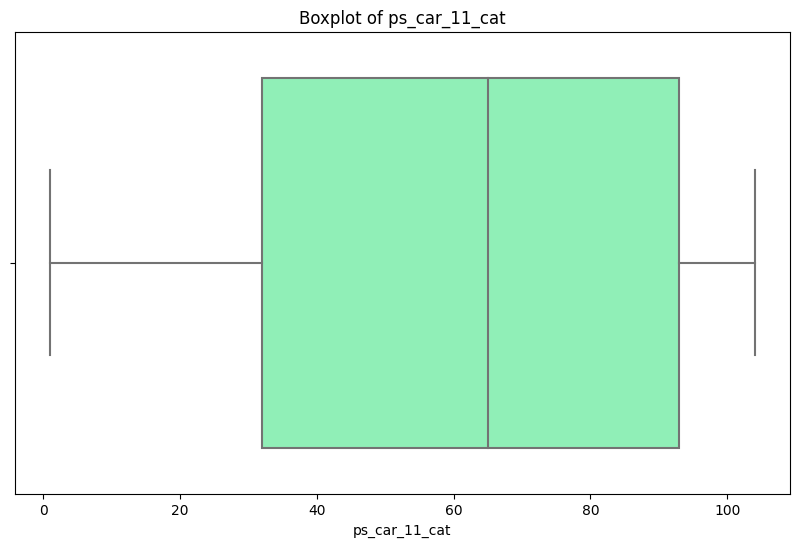

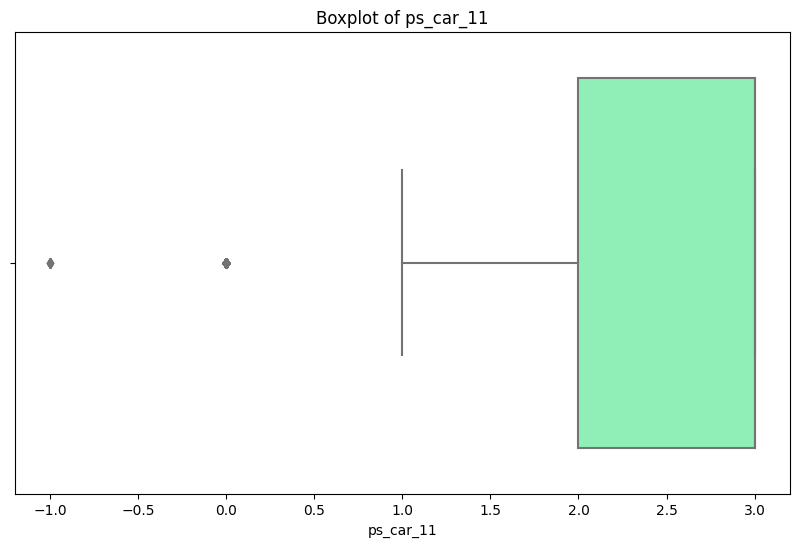

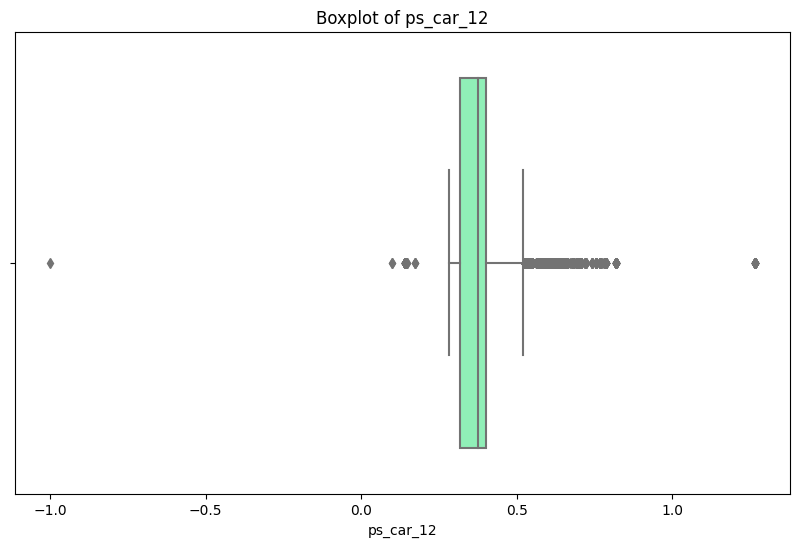

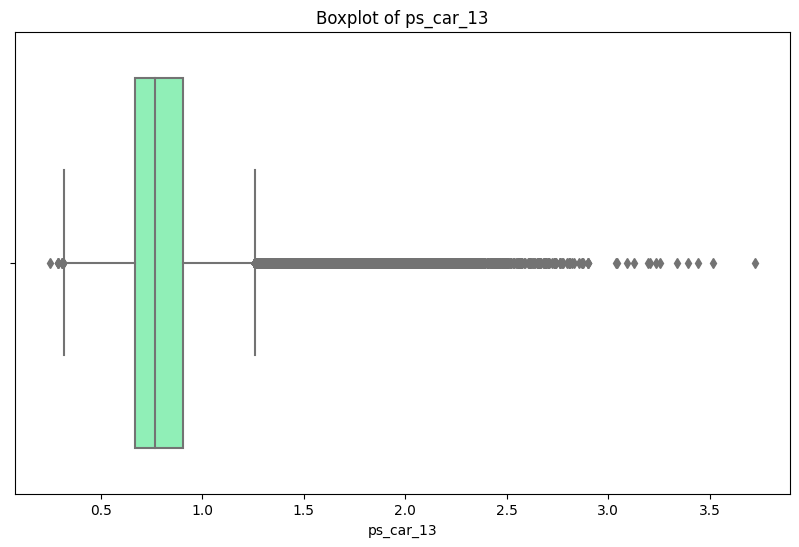

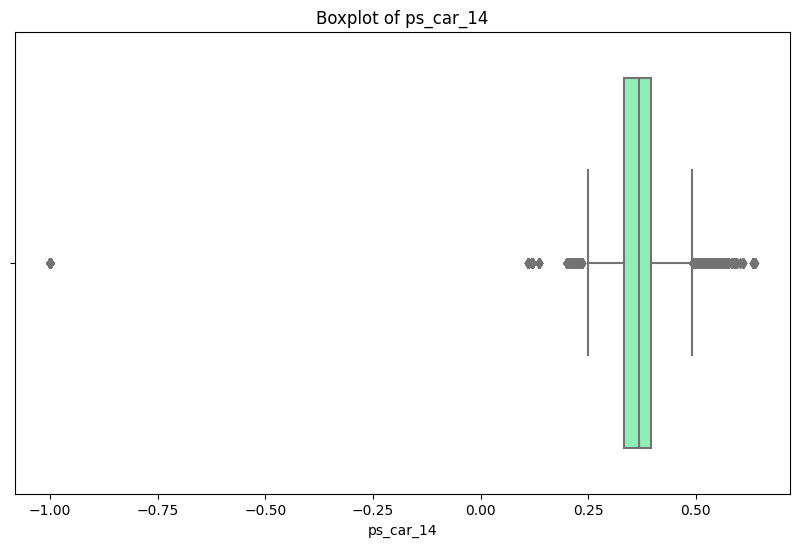

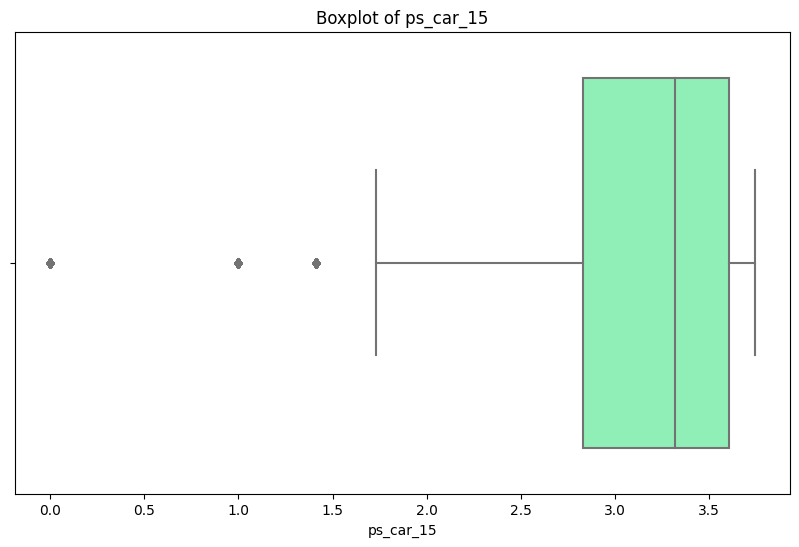

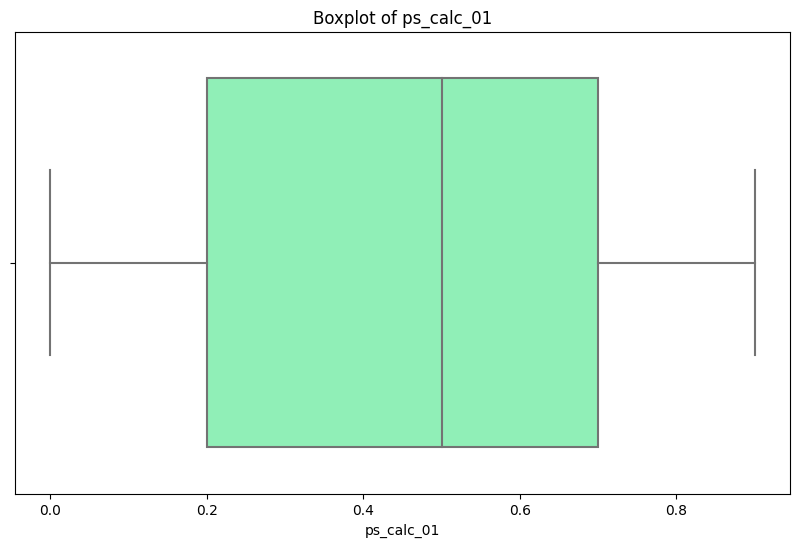

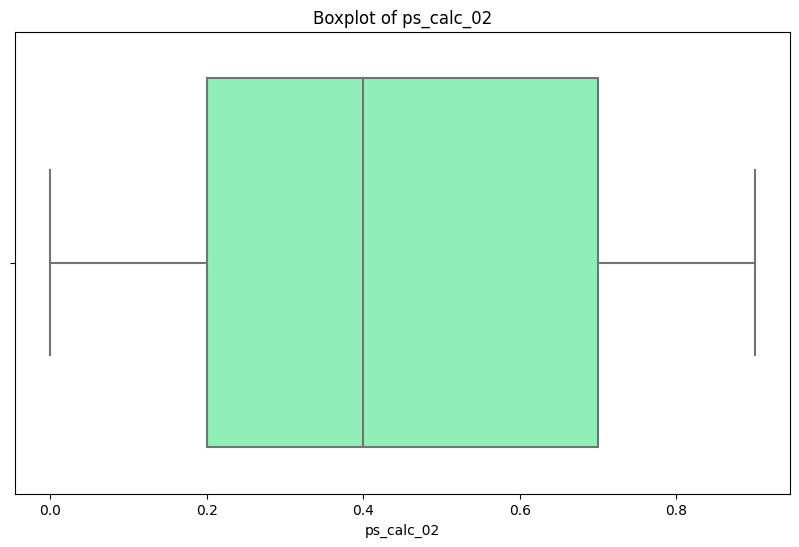

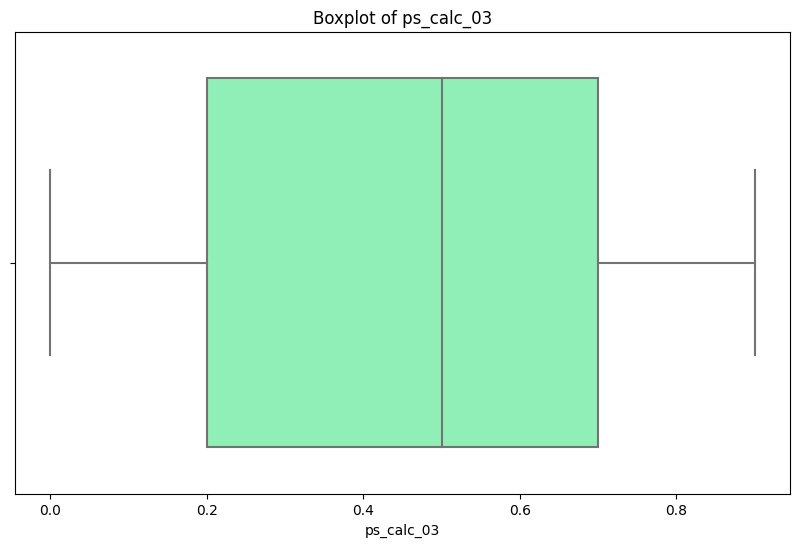

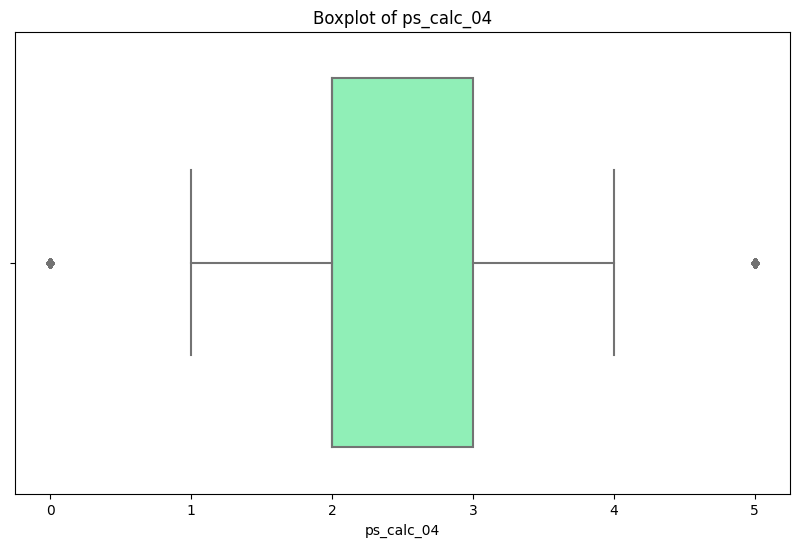

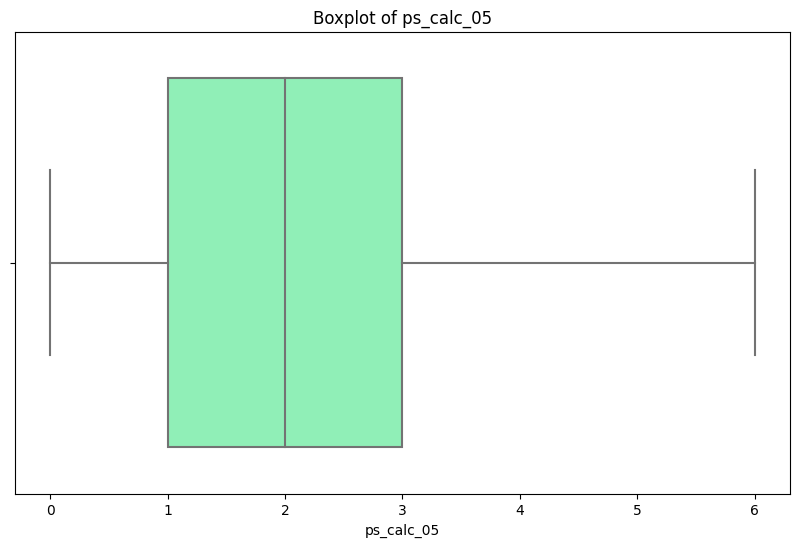

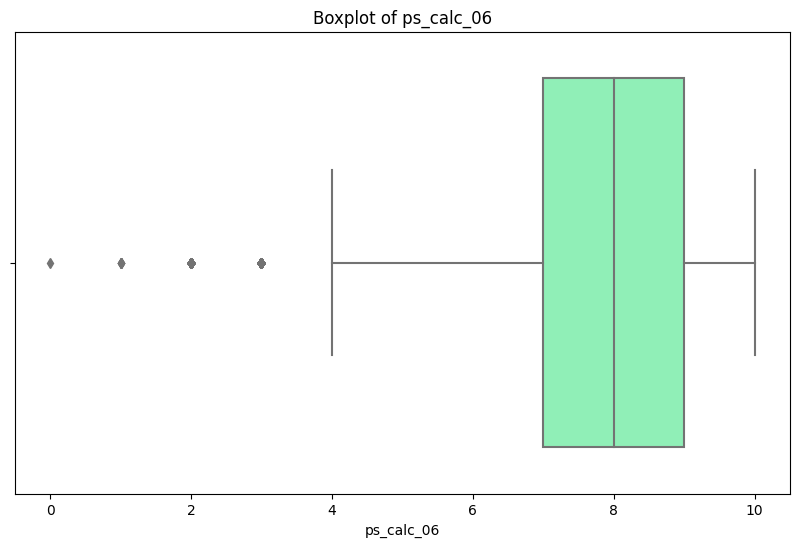

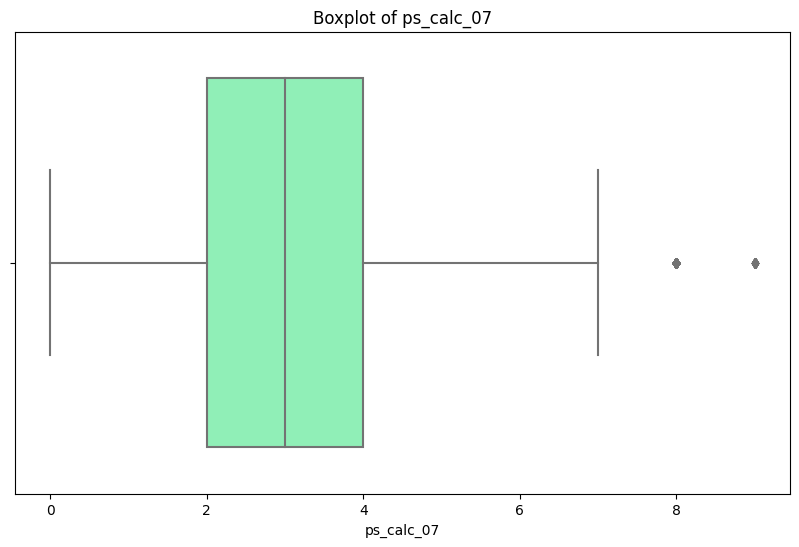

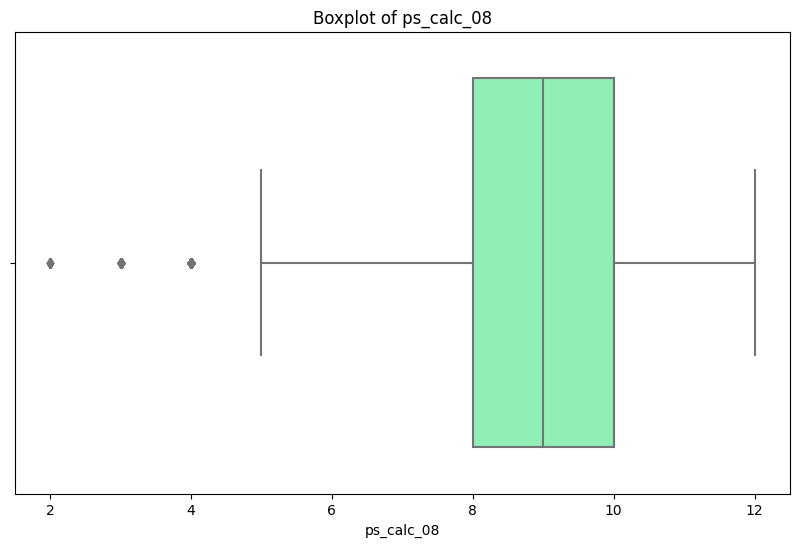

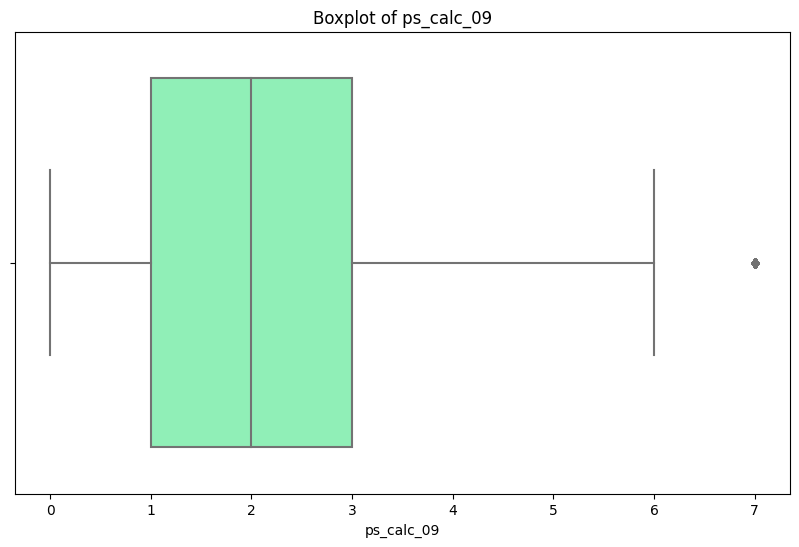

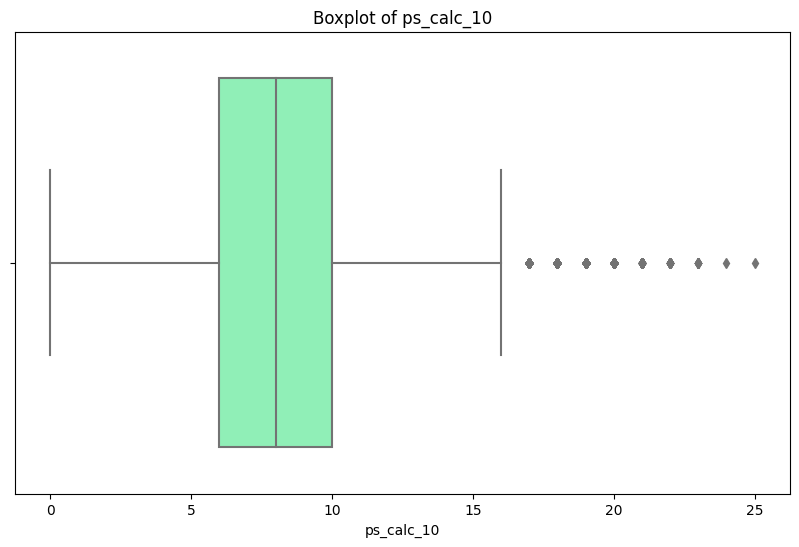

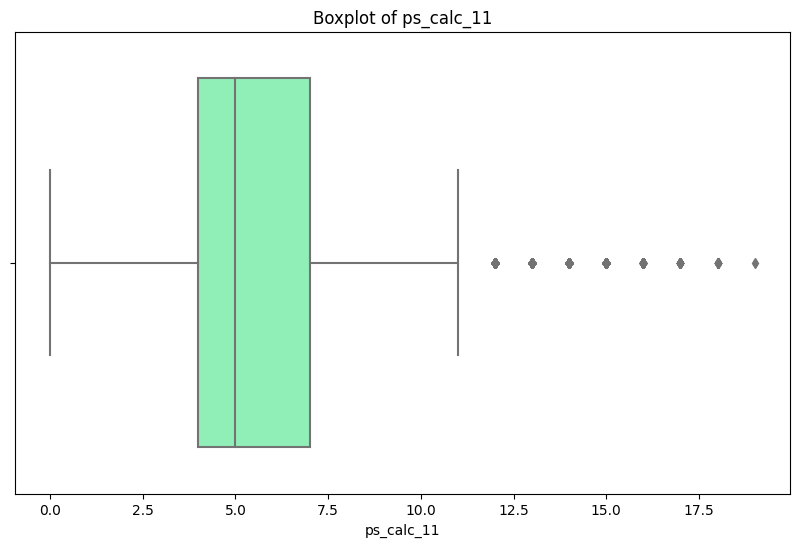

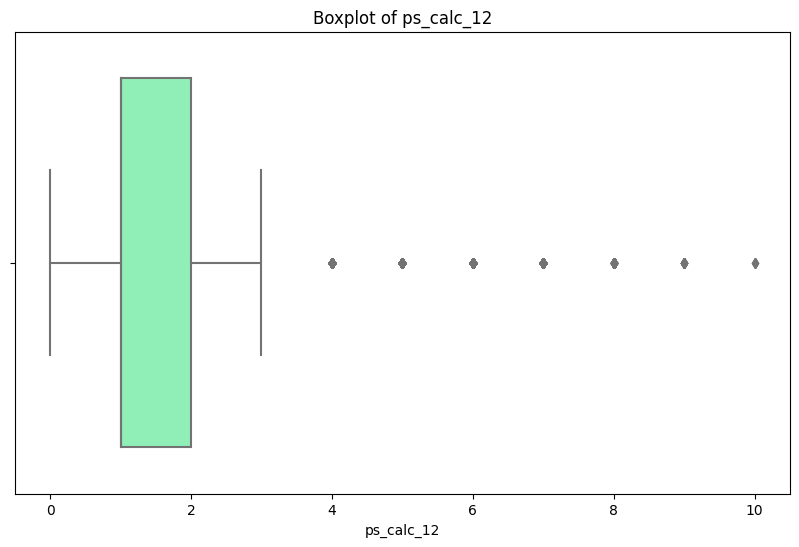

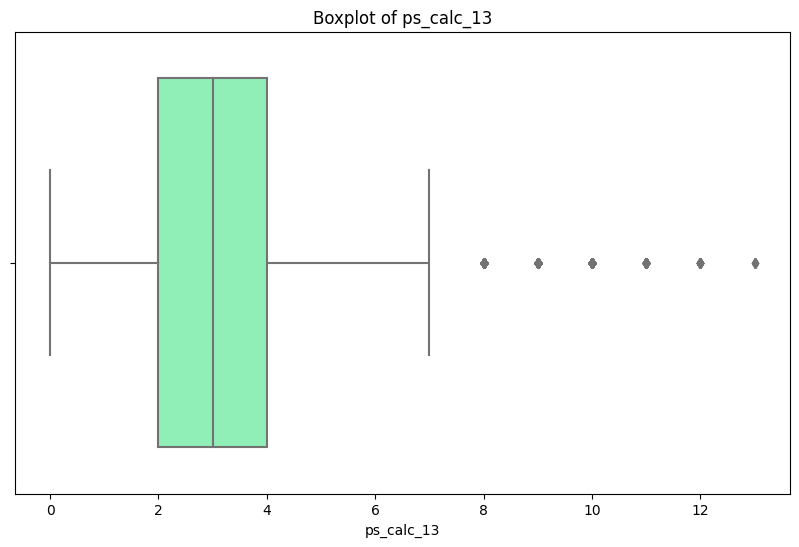

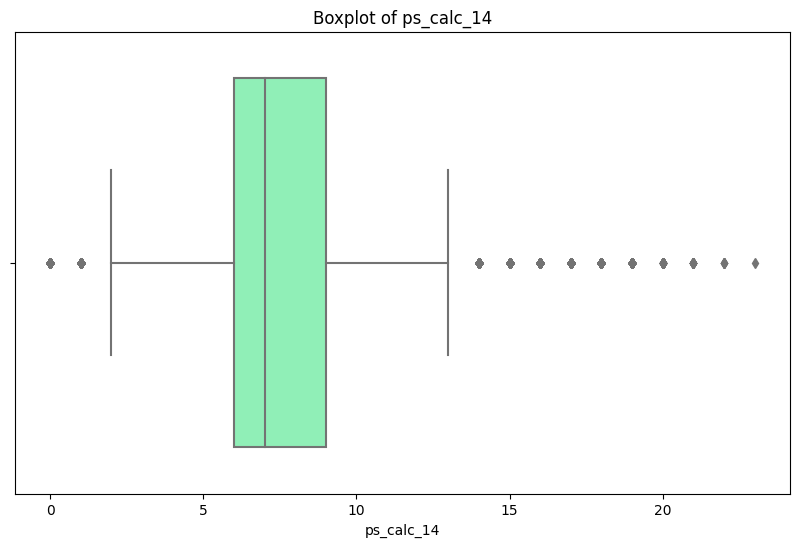

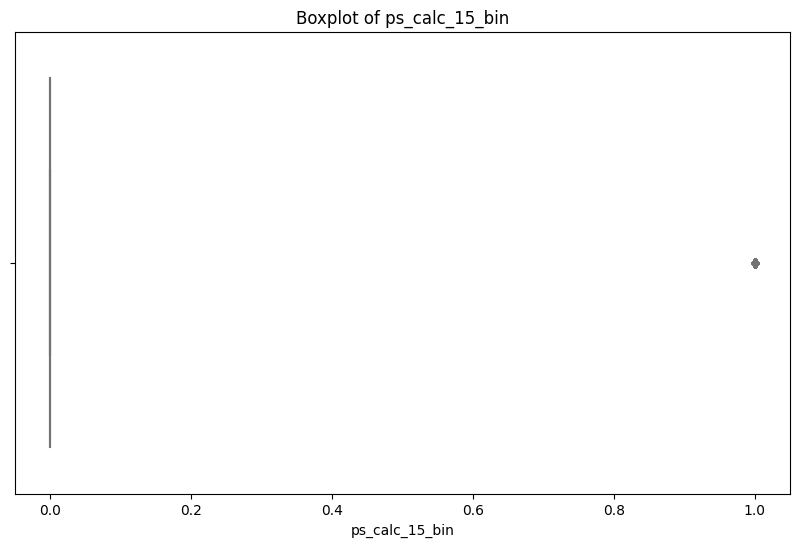

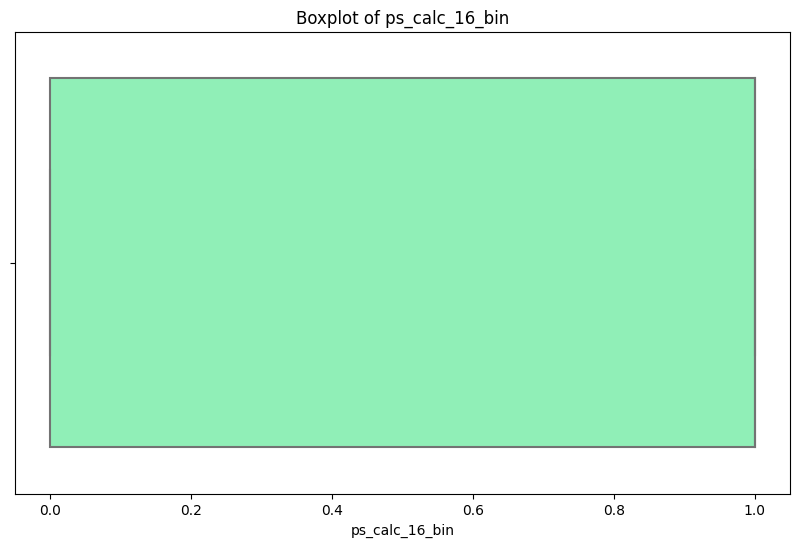

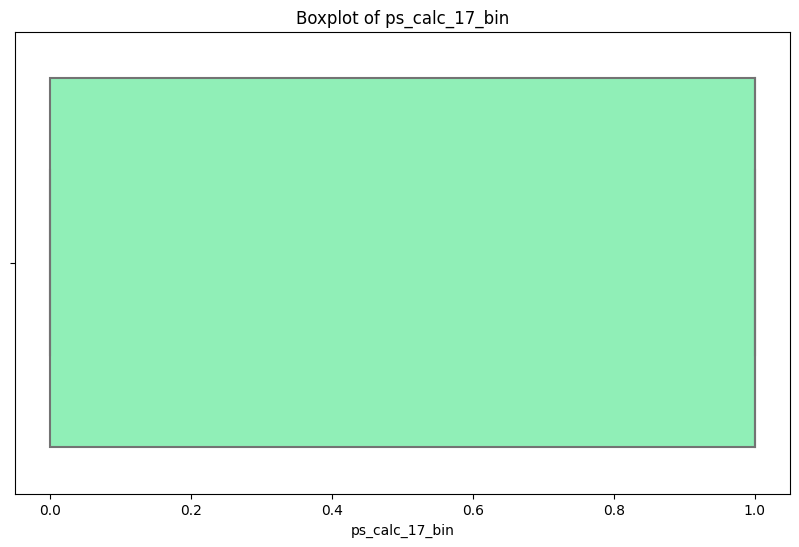

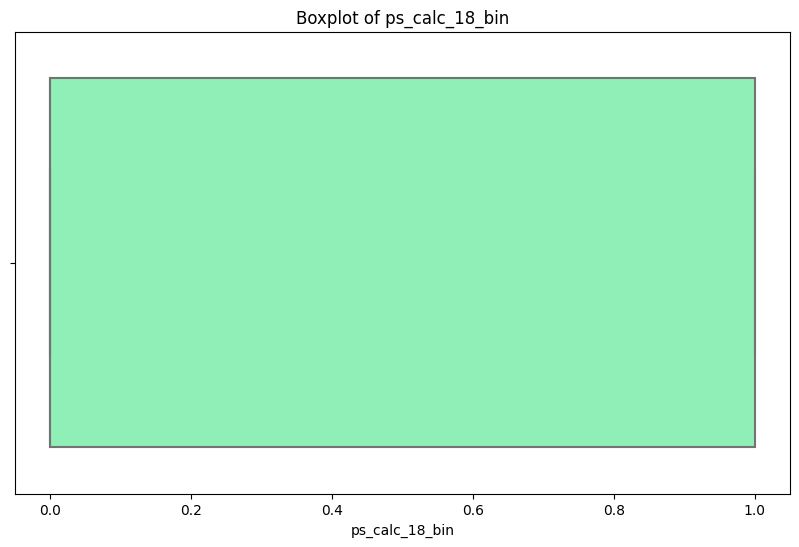

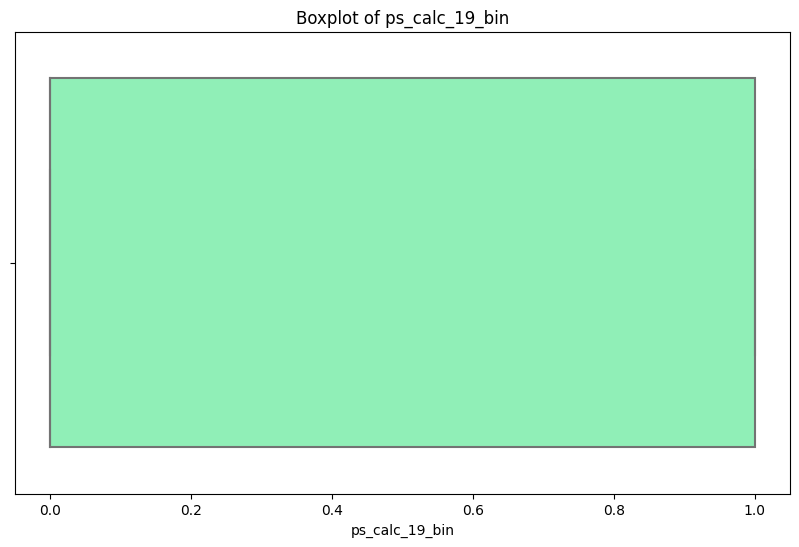

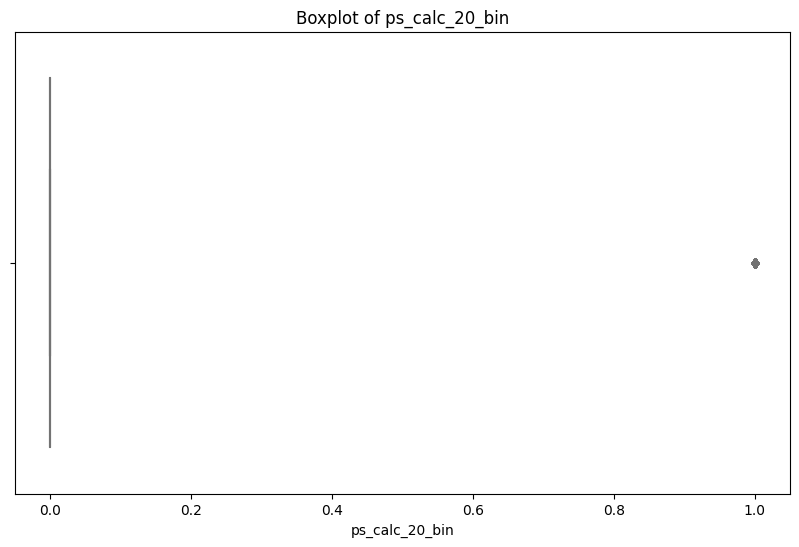

In [11]:


# Filter numeric columns
numeric_cols =df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()



In [12]:
X=df.drop(columns='target')
Y=df['target']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [14]:
!pip install xgboost


In [17]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

param = {
    'max_depth': 3, 
    'eta': 0.3,      
    'objective': 'binary:logistic', 
}
num_round = 100

# Train the model
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the test set
preds = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in preds]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 96.30%
Precision: 0.50
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[143302      2]
 [  5497      2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143304
           1       0.50      0.00      0.00      5499

    accuracy                           0.96    148803
   macro avg       0.73      0.50      0.49    148803
weighted avg       0.95      0.96      0.94    148803



In [18]:

def evaluate_model(X_train, y_train, X_test, y_test):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    param = {'max_depth': 3, 'eta': 0.3, 'objective': 'binary:logistic'}
    num_round = 100
    bst = xgb.train(param, dtrain, num_round)
    preds = bst.predict(dtest)
    predictions = [1 if value > 0.5 else 0 for value in preds]
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

In [26]:
def add_results_to_df(method_name, accuracy, precision, recall, f1):
    global results_df
    result = pd.DataFrame([[method_name, accuracy, precision, recall, f1]], columns=['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    results_df = pd.concat([results_df, result], ignore_index=True)


In [19]:
# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [46]:
# Baseline model with no feature selection
accuracy, precision, recall, f1 = evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test)
add_results_to_df('No Feature Selection', accuracy, precision, recall, f1)

In [27]:
# Variance Threshold
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_train)
accuracy, precision, recall, f1 = evaluate_model(X_selected, y_train, selector.transform(X_test), y_test)
add_results_to_df('Variance Threshold', accuracy, precision, recall, f1)

/tmp/ipykernel_300/11198239.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result], ignore_index=True)


In [29]:
# Correlation Coefficient
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_selected = X_train.drop(X_train[to_drop], axis=1)
accuracy, precision, recall, f1 = evaluate_model(X_selected, y_train, X_test.drop(X_test[to_drop], axis=1), y_test)
add_results_to_df('Correlation Coefficient', accuracy, precision, recall, f1)

In [30]:
# ANOVA F-test
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_train, y_train)
accuracy, precision, recall, f1 = evaluate_model(X_selected, y_train, selector.transform(X_test), y_test)
add_results_to_df('AnnovaFtest', accuracy, precision, recall, f1)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=5000)  # Increased max_iter
selector = RFE(model, n_features_to_select=10)
X_selected = selector.fit_transform(X_train_scaled, y_train)
accuracy, precision, recall, f1 = evaluate_model(X_selected, y_train, selector.transform(X_test_scaled), y_test)
add_results_to_df('RFE', accuracy, precision, recall, f1)

In [40]:

# Lasso (L1 Regularization)
model = LassoCV(cv=5, n_jobs=-1).fit(X_train_scaled, y_train)
importance = np.abs(model.coef_)
selected_features = np.where(importance > 0)[0]
if len(selected_features) > 0:
    X_selected = X_train_scaled[:, selected_features]
    accuracy, precision, recall, f1 = evaluate_model(X_selected, y_train, X_test_scaled[:, selected_features], y_test)
    add_results_to_df('Lasso', accuracy, precision, recall, f1)



In [41]:

# Ridge (L2 Regularization)
model = RidgeCV(cv=5).fit(X_train_scaled, y_train)
importance = np.abs(model.coef_)
selected_features = np.argsort(importance)[-10:]
X_selected = X_train_scaled[:, selected_features]
accuracy, precision, recall, f1 = evaluate_model(X_selected, y_train, X_test_scaled[:, selected_features], y_test)
add_results_to_df('Ridge', accuracy, precision, recall, f1)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Tree-based feature importance (Random Forest)
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)  # Parallelizing
model.fit(X_train_scaled, y_train)
importance = model.feature_importances_
selected_features = np.argsort(importance)[-10:]
X_selected = X_train_scaled[:, selected_features]
accuracy, precision, recall, f1 = evaluate_model(X_selected, y_train, X_test_scaled[:, selected_features], y_test)
add_results_to_df('Random Forest', accuracy, precision, recall, f1)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Hierarchical Clustering for Feature Selection
X_scaled = scaler.fit_transform(X_train.T)
linkage_matrix = linkage(X_scaled, method='ward')
cluster_ids = fcluster(linkage_matrix, t=10, criterion='maxclust')
representative_features = [np.where(cluster_ids == i)[0][0] for i in np.unique(cluster_ids)]
if len(representative_features) > 0:
    X_selected = X_train_scaled[:, representative_features]
    accuracy, precision, recall, f1 = evaluate_model(X_selected, y_train, X_test_scaled[:, representative_features], y_test)
    add_results_to_df('Hierarchical Clustering', accuracy, precision, recall, f1)


In [48]:
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)


In [49]:
print(results_df)

                    Method  Accuracy  Precision    Recall  F1 Score
0                    Lasso  0.963052   0.600000  0.000546  0.001090
1       Variance Threshold  0.963052   0.666667  0.000364  0.000727
2  Correlation Coefficient  0.963045   0.500000  0.000364  0.000727
3     No Feature Selection  0.963045   0.500000  0.000364  0.000727
4              AnnovaFtest  0.963045   0.000000  0.000000  0.000000
5                      RFE  0.963038   0.000000  0.000000  0.000000
6                    Ridge  0.963045   0.000000  0.000000  0.000000
7            Random Forest  0.963045   0.000000  0.000000  0.000000
8  Hierarchical Clustering  0.963025   0.000000  0.000000  0.000000


In [50]:
test_df=pd.read_csv("/kaggle/input/dataset-4/test.csv")

In [52]:
# Lasso (L1 Regularization)
model = LassoCV(cv=5, n_jobs=-1).fit(X_train_scaled, y_train)
importance = np.abs(model.coef_)
selected_features = np.where(importance > 0)[0]
if len(selected_features) > 0:
    X_selected = X_train_scaled[:, selected_features]
    dtrain = xgb.DMatrix(X_selected, label=y_train)
#     dtest = xgb.DMatrix(X_test, label=y_test)
    param = {'max_depth': 3, 'eta': 0.3, 'objective': 'binary:logistic'}
    num_round = 100
    bst = xgb.train(param, dtrain, num_round)

In [55]:
test_selected_features = test_features_scaled[:, selected_features]
dtest = xgb.DMatrix(test_selected_features)

In [56]:
preds = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in preds]

In [59]:
# Create a submission DataFrame
submission_df = pd.DataFrame({'id': test_ids, 'target': predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the submission DataFrame
print(submission_df)

             id  target
0             0       0
1             1       0
2             2       0
3             3       0
4             4       0
...         ...     ...
892811  1488022       0
892812  1488023       0
892813  1488024       0
892814  1488025       0
892815  1488026       0

[892816 rows x 2 columns]
